In [2]:
from model import train_keras_model
import pandas as pd
import matplotlib.pyplot as plt

#### Import data and train model

In [4]:
X_train_path = 'MNist_ttt4275/MNist_ttt4275/train_images.bin'
Y_train_path = 'MNist_ttt4275/MNist_ttt4275/train_labels.bin'

with open(X_train_path, "rb") as f:
    X_train = f.read()
with open(Y_train_path, "rb") as f:
    Y_train = f.read()
    
#model = train_keras_model(X_train, Y_train)

In [37]:
import numpy as np
from PIL import Image

images = []
# Define width and height
w, h = 28, 28
with open(X_train_path, mode='rb') as f:
    while True:
        try:
            d = np.fromfile(f, dtype=np.uint8, count=w*h).reshape(h, w)
            images.append(d)
        except:
            break

# Make into PIL Image and save
#pil_image = Image.fromarray(d)

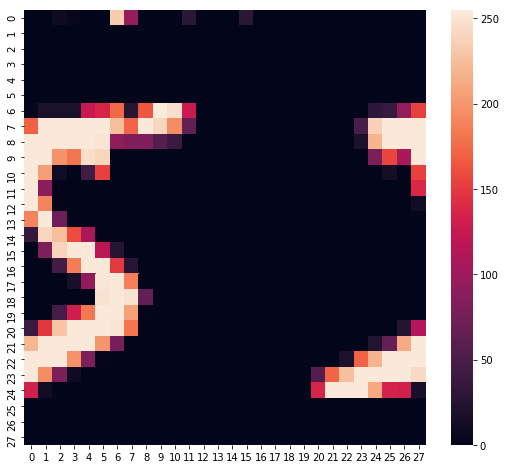

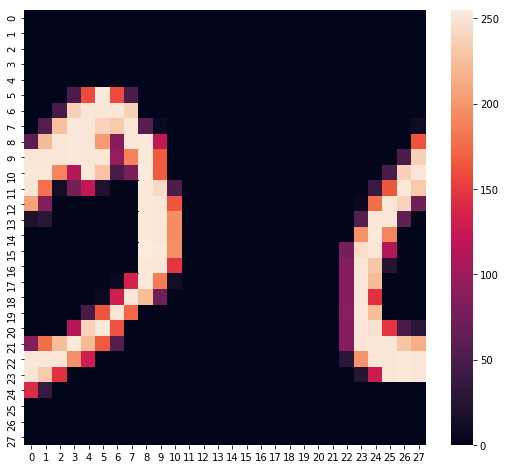

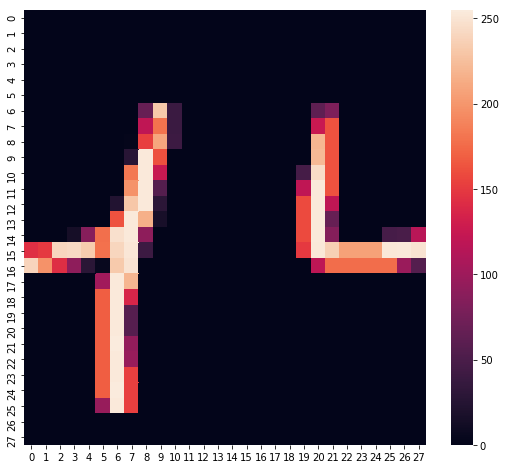

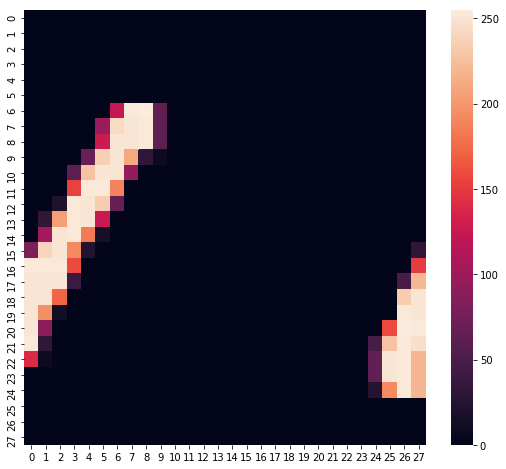

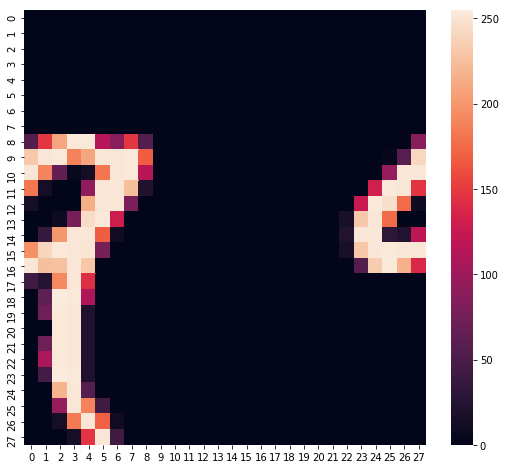

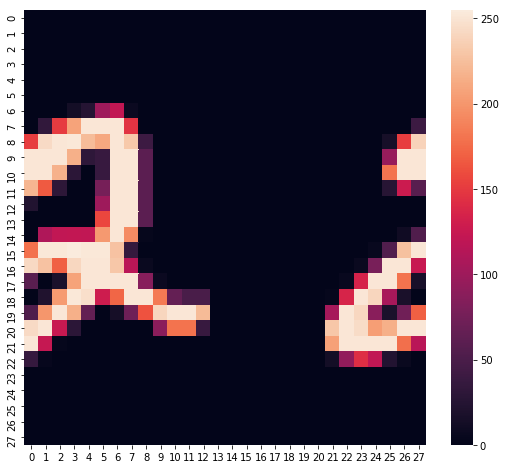

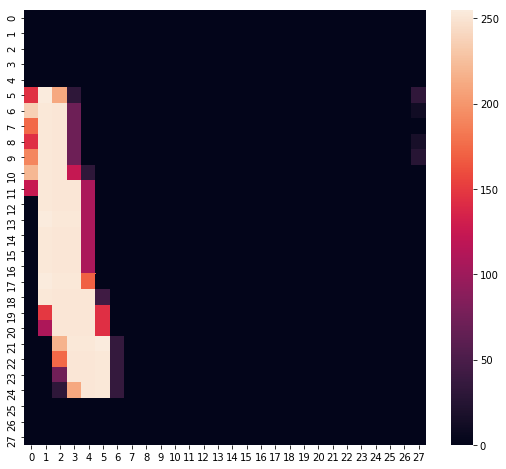

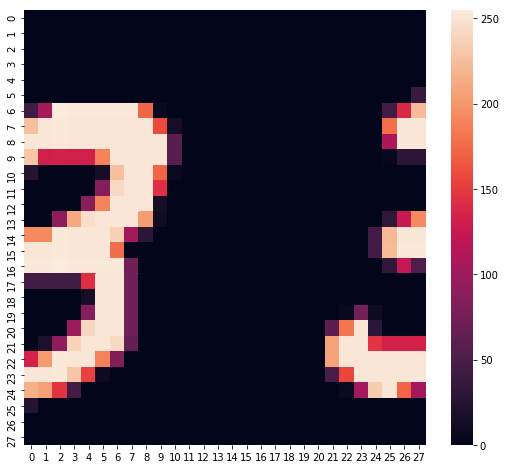

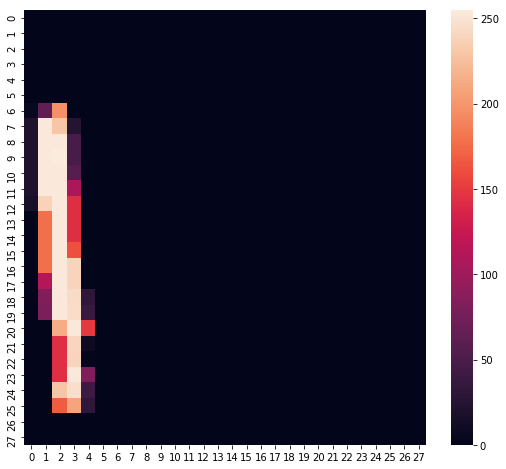

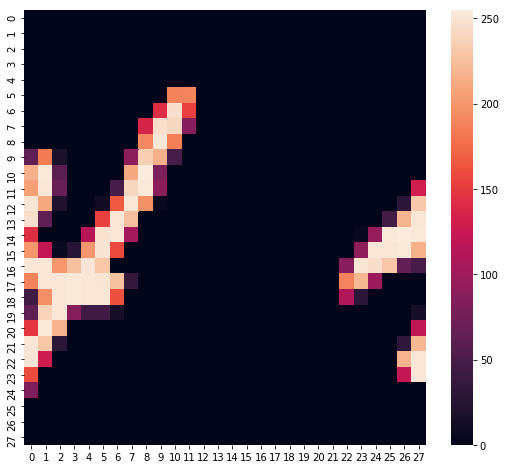

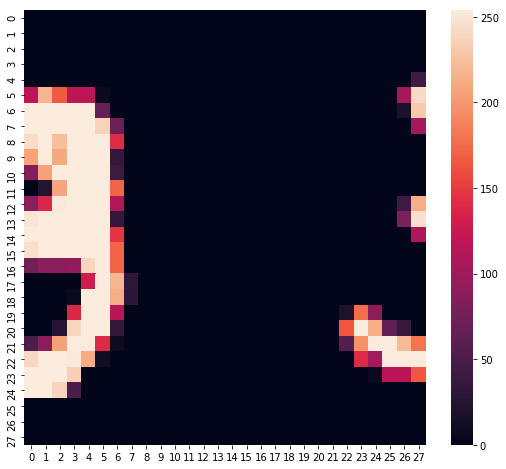

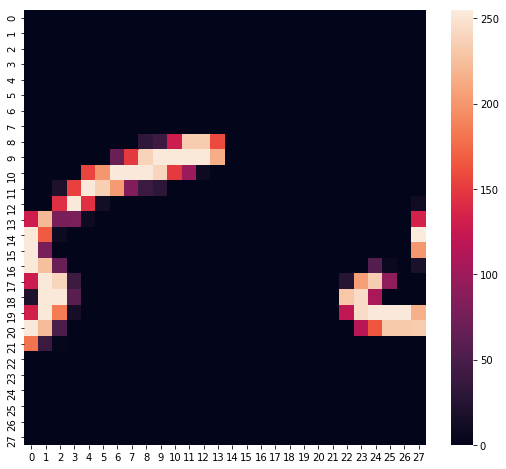

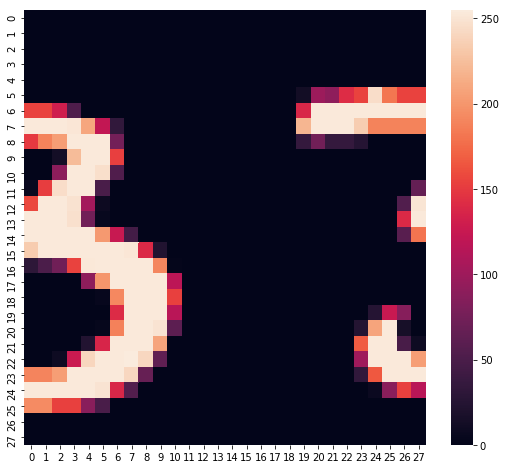

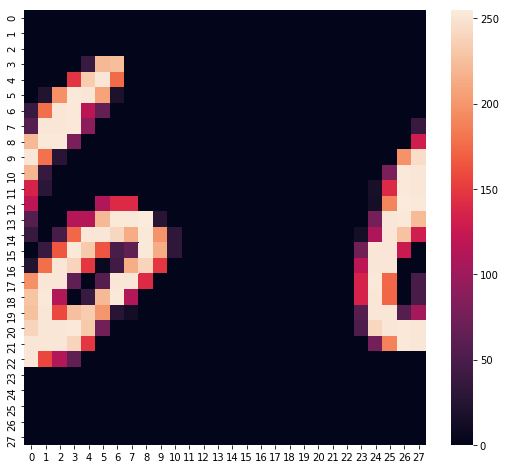

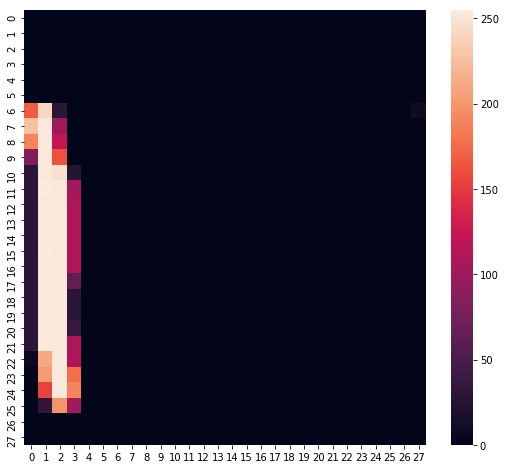

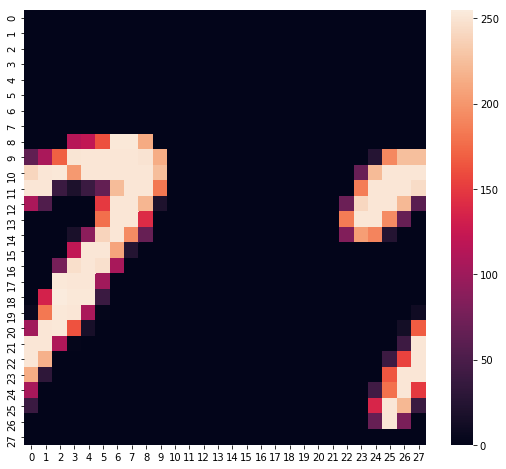

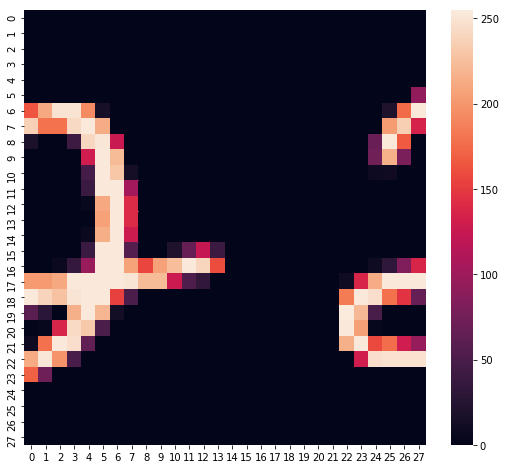

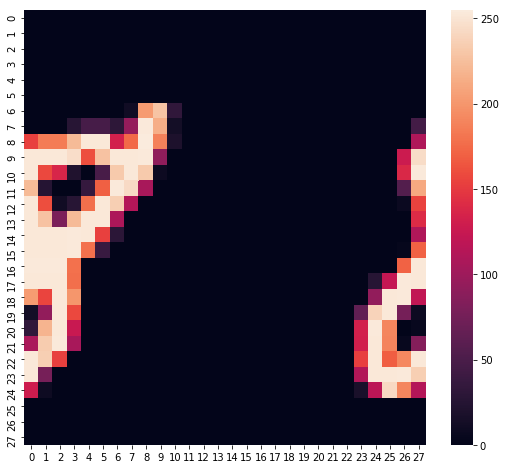

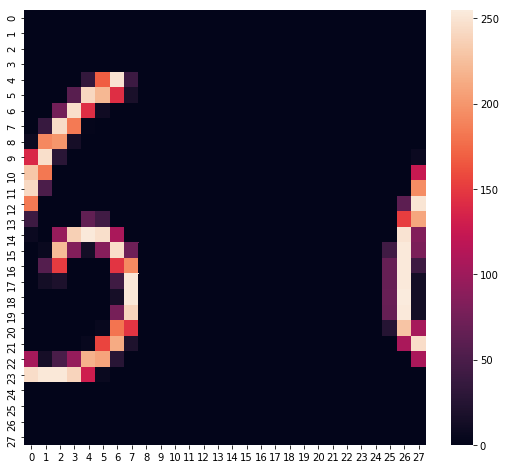

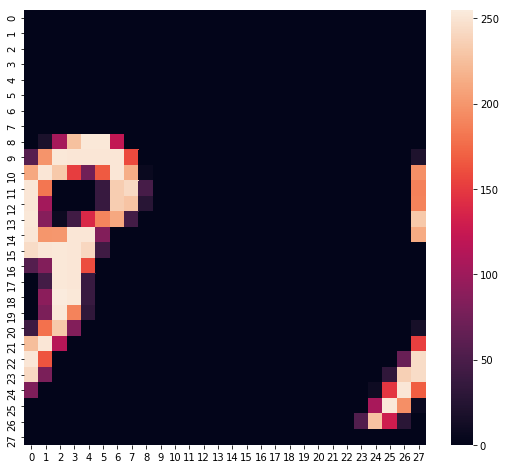

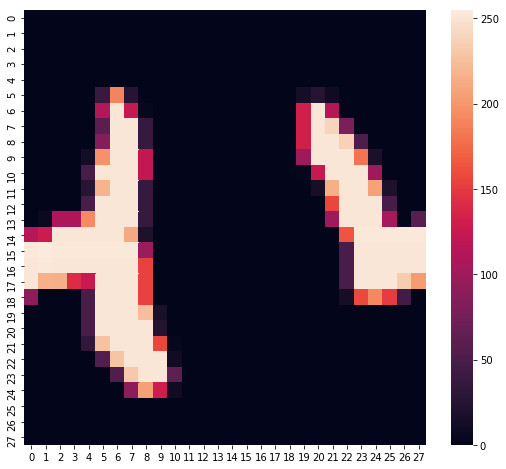

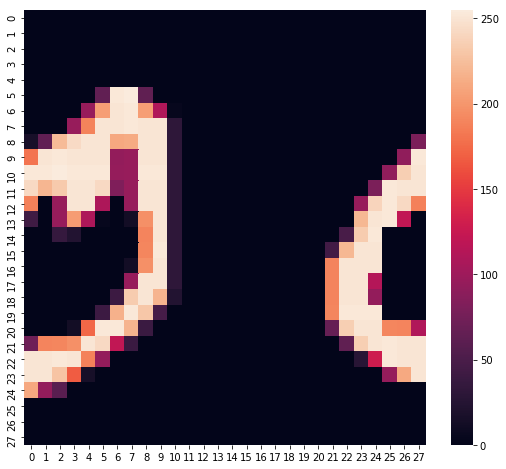

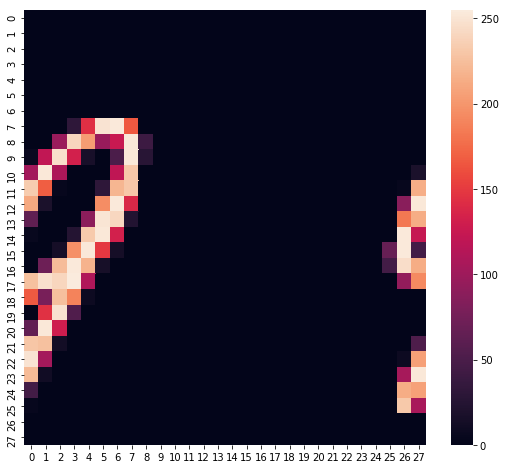

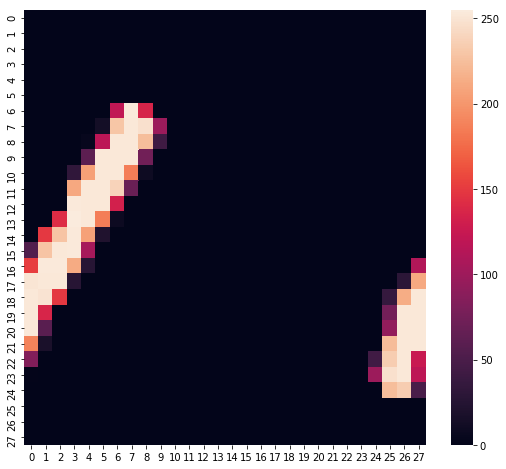

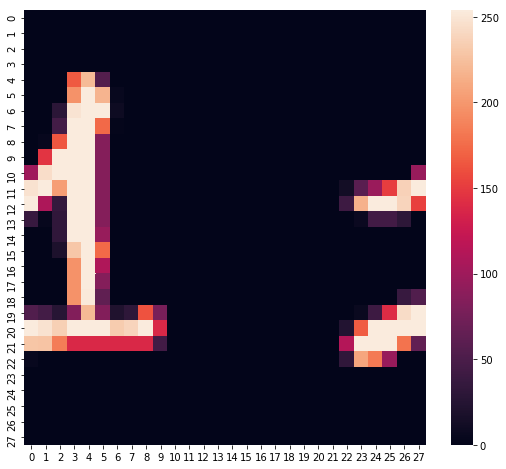

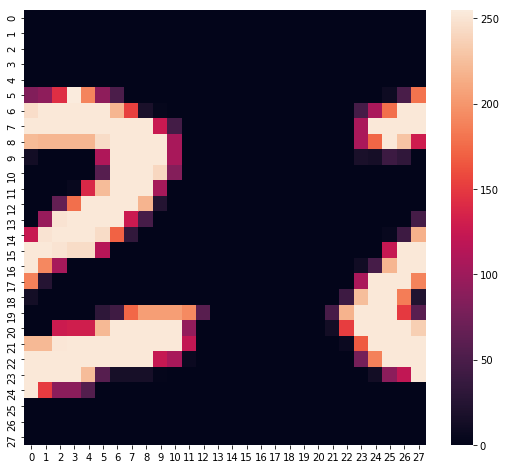

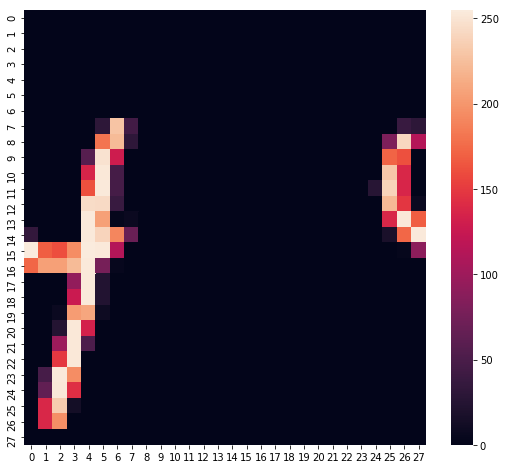

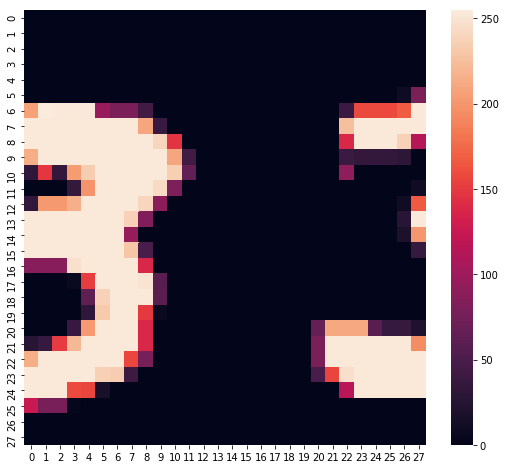

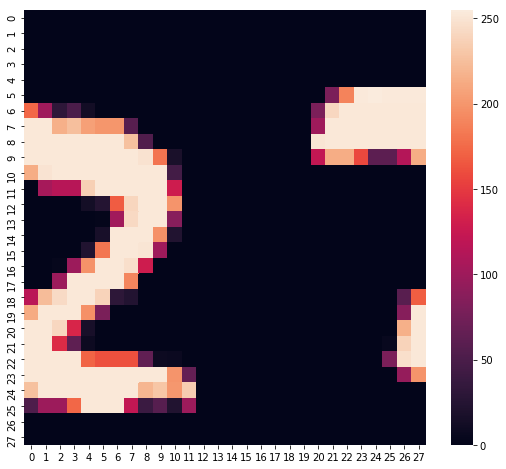

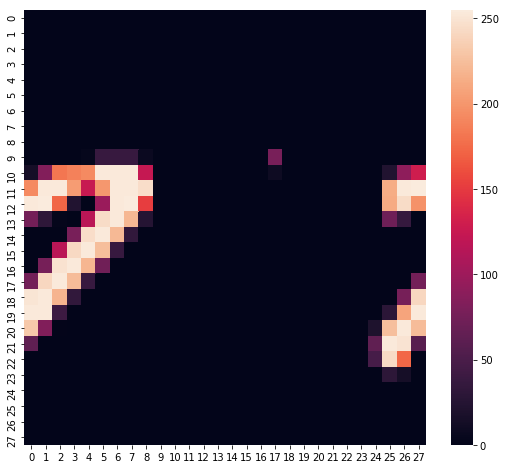

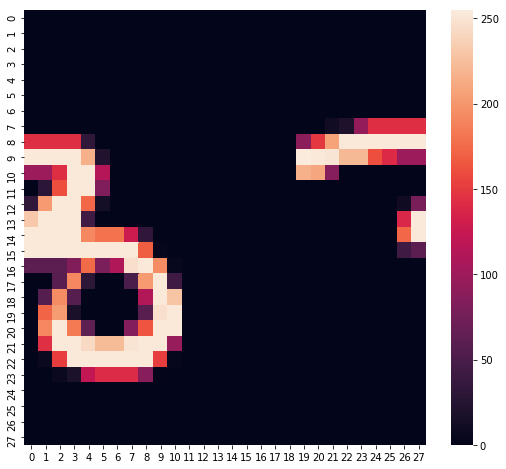

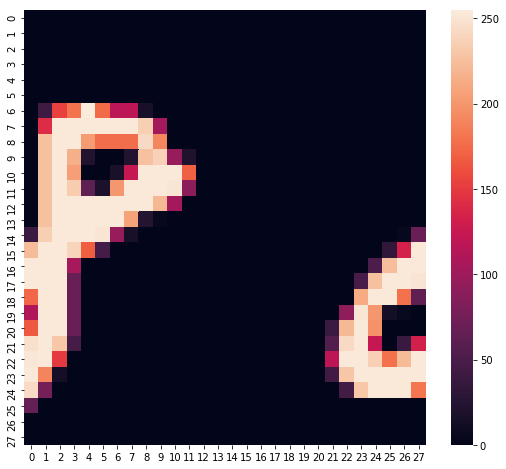

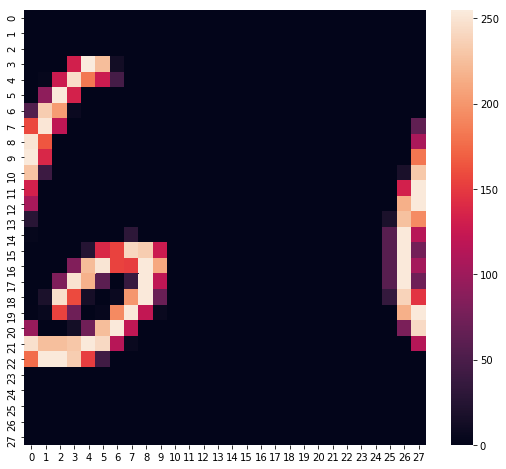

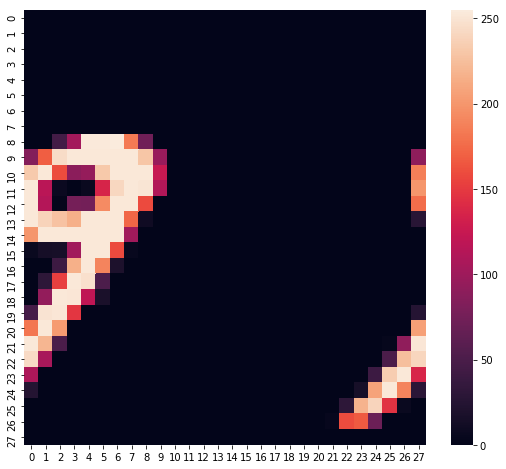

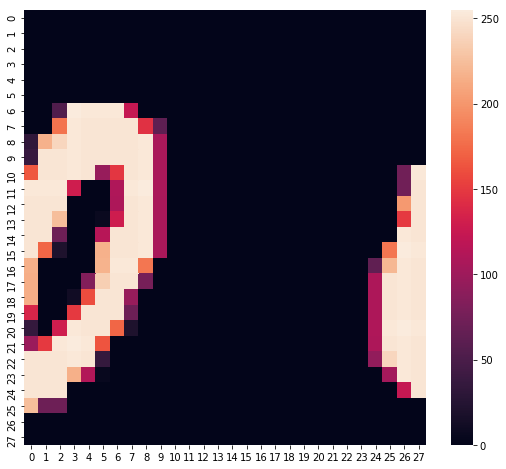

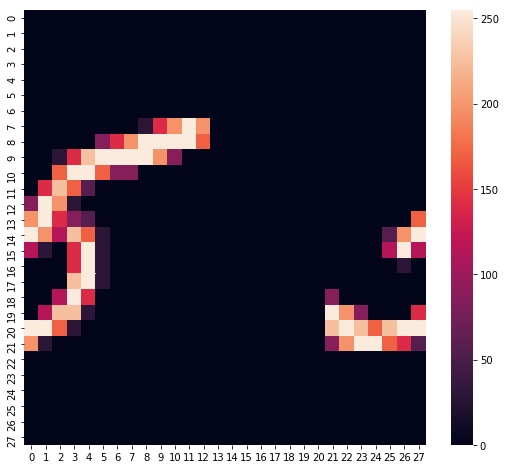

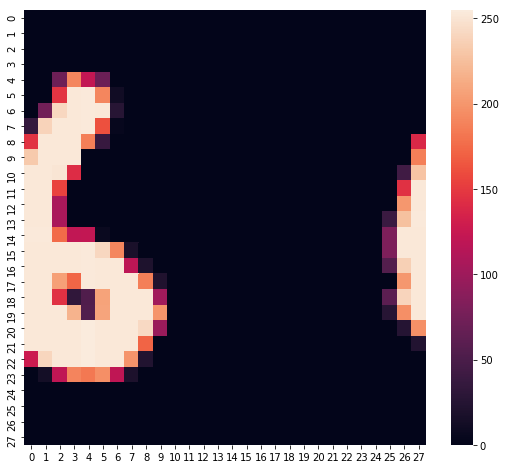

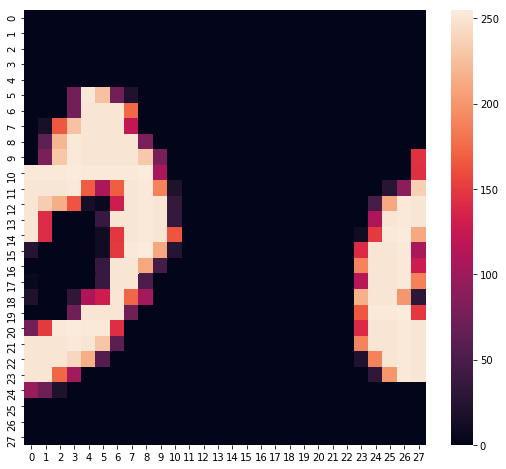

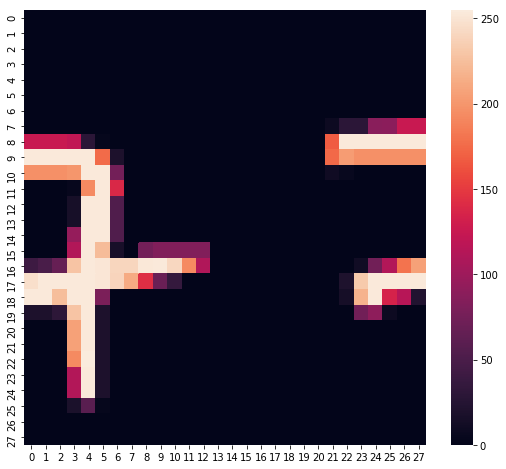

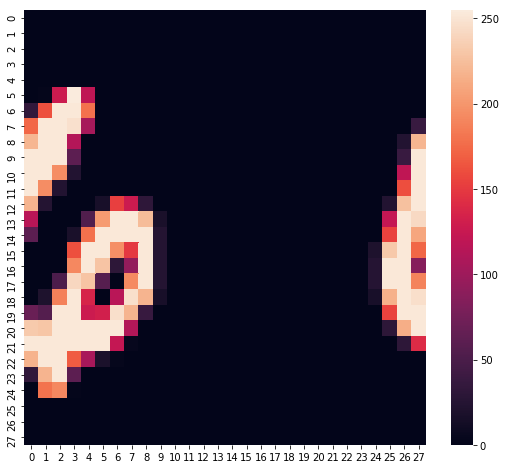

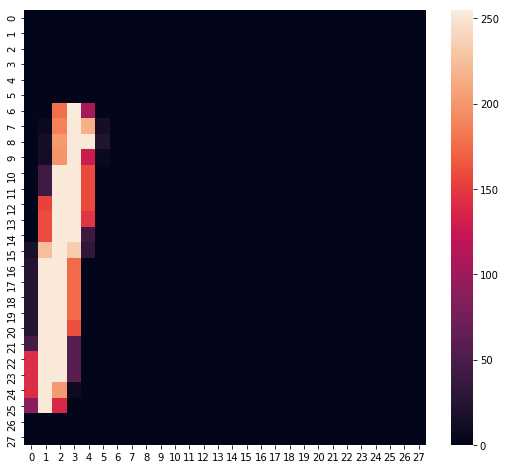

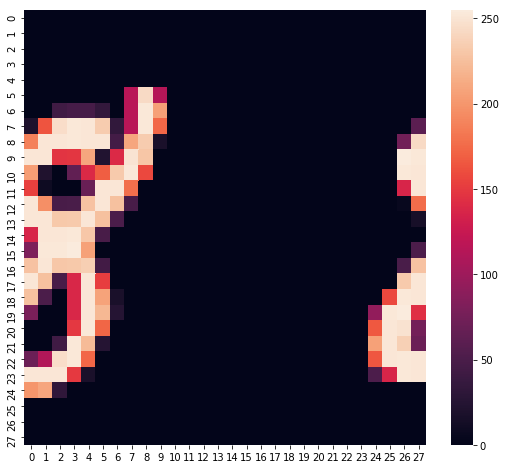

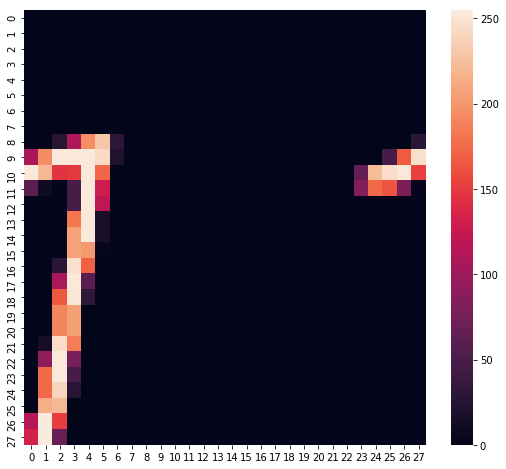

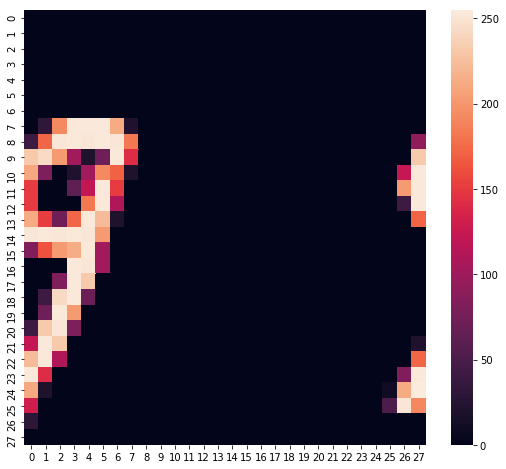

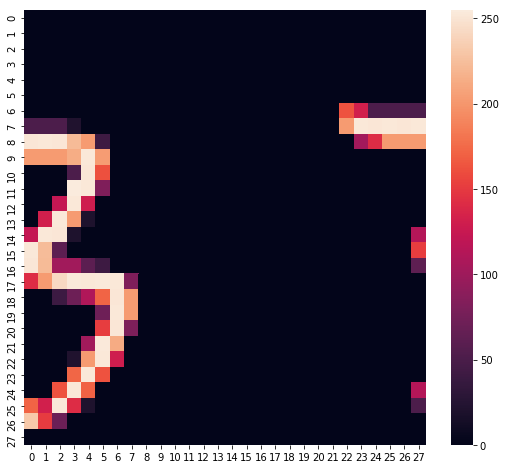

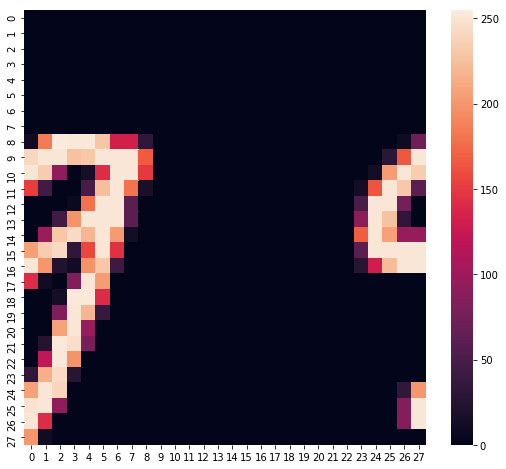

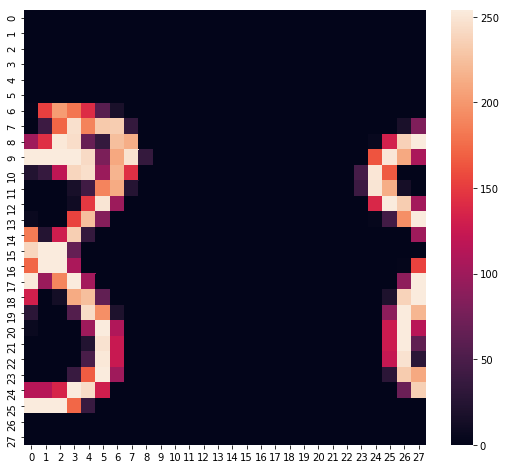

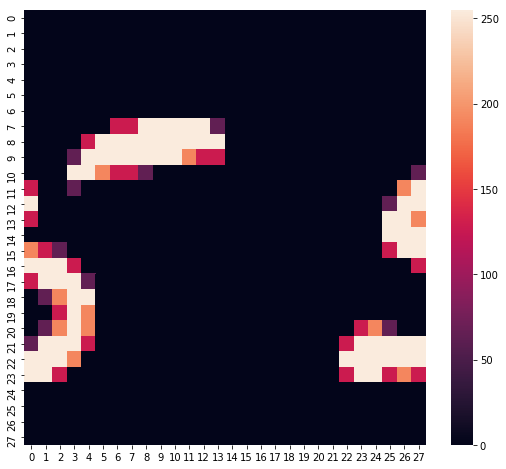

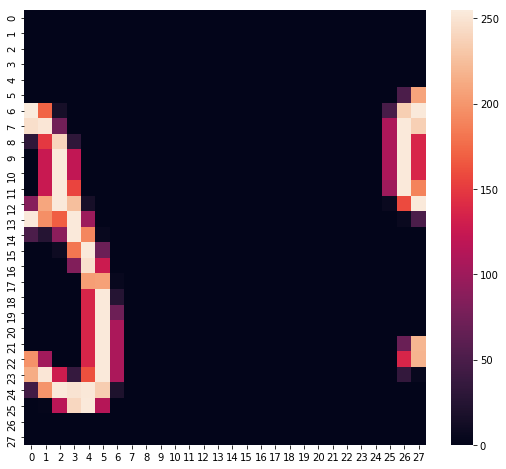

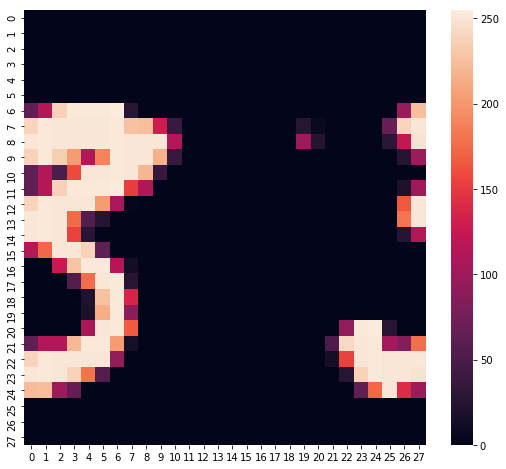

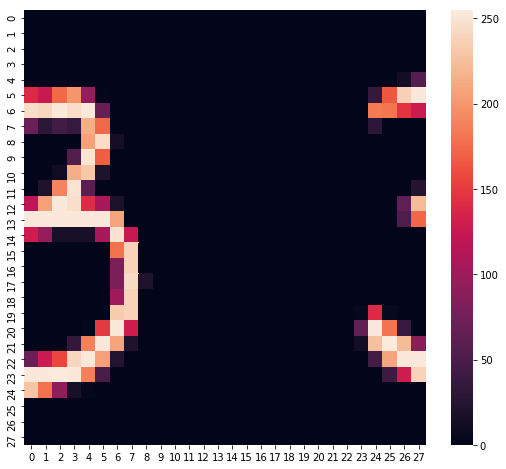

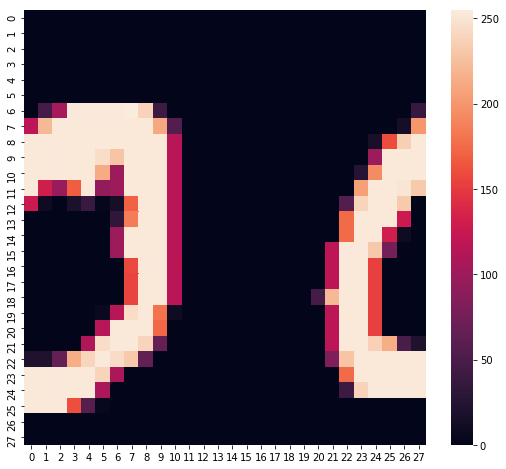

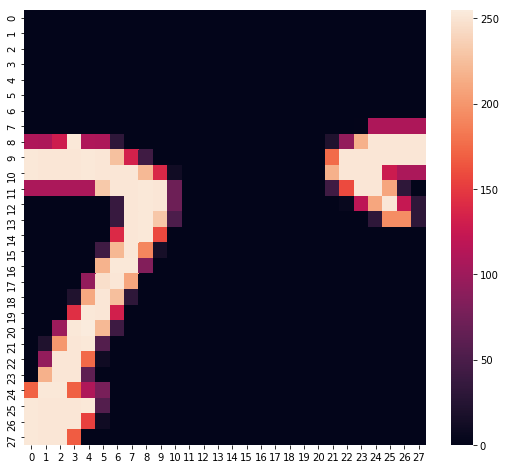

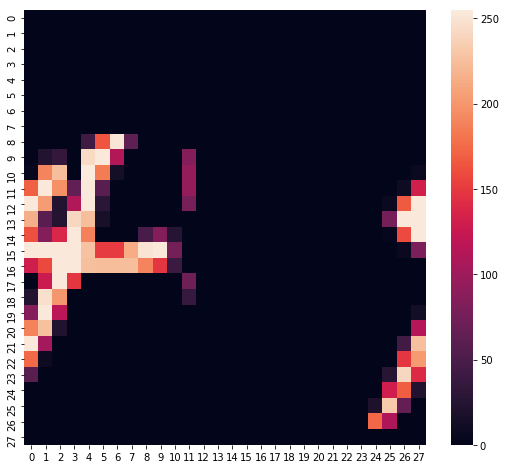

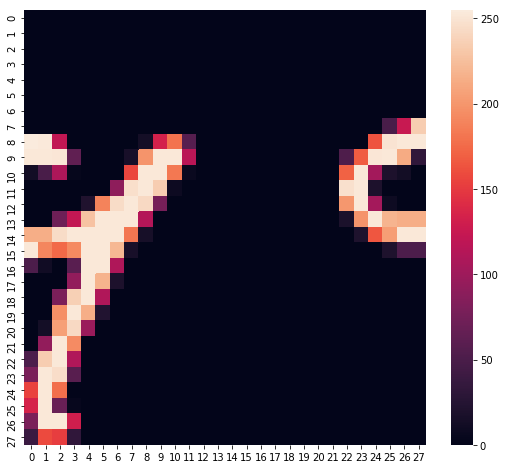

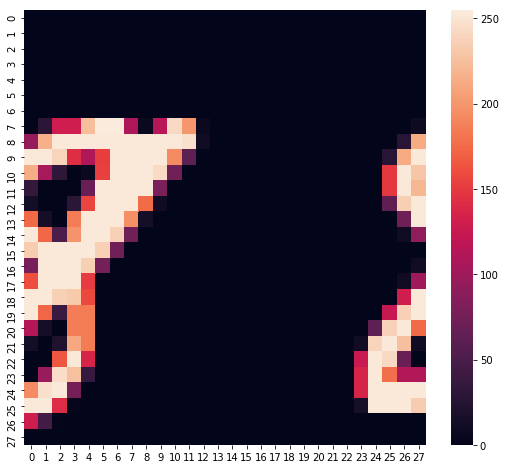

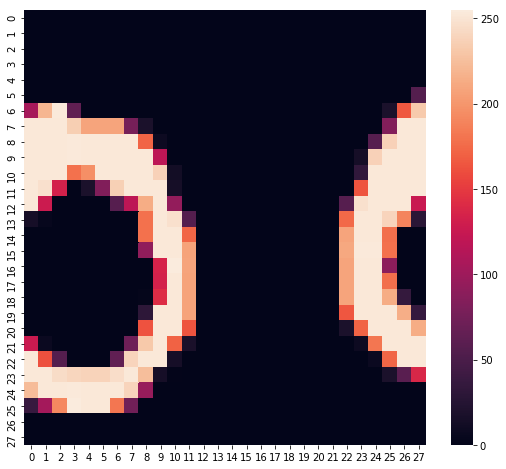

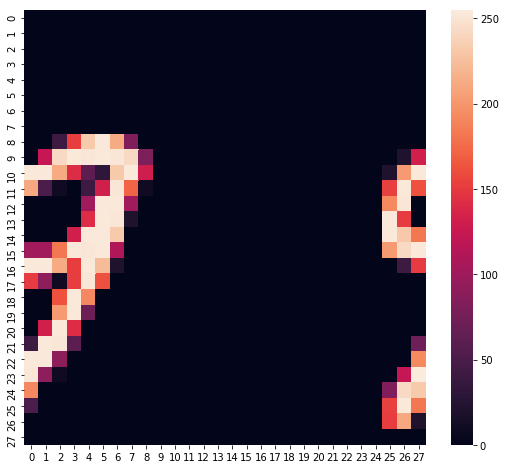

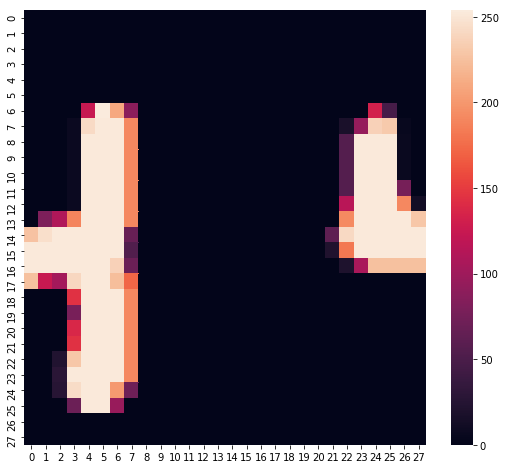

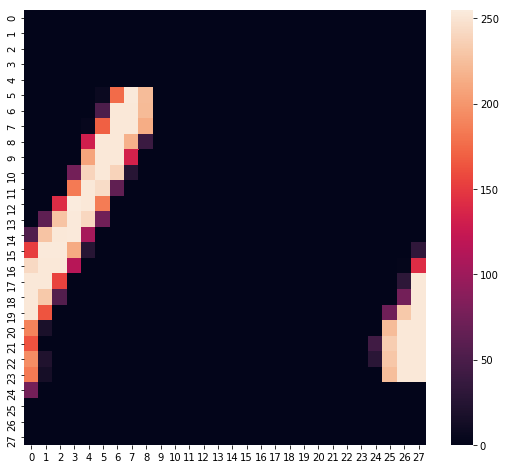

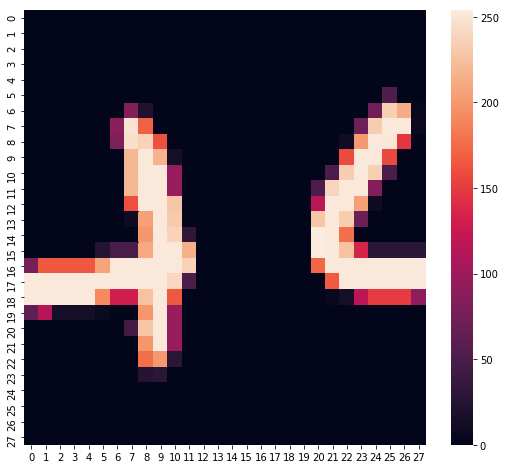

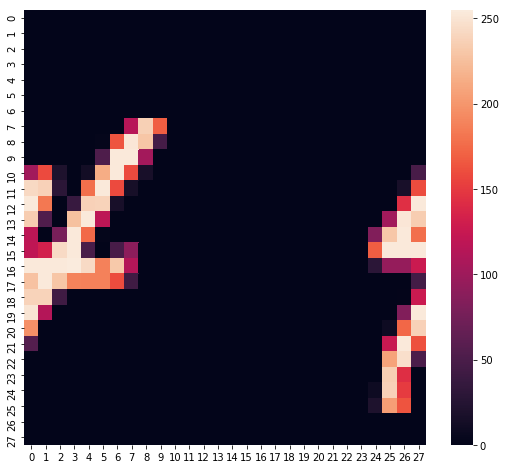

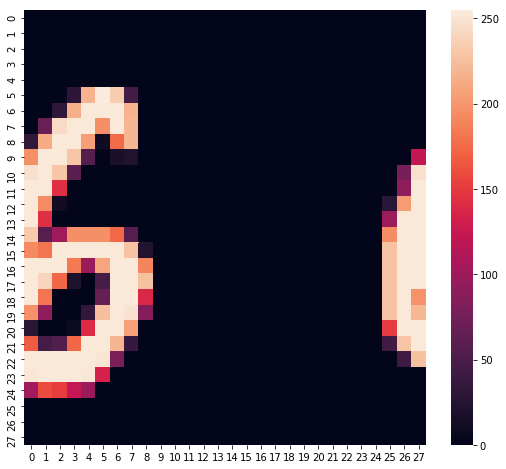

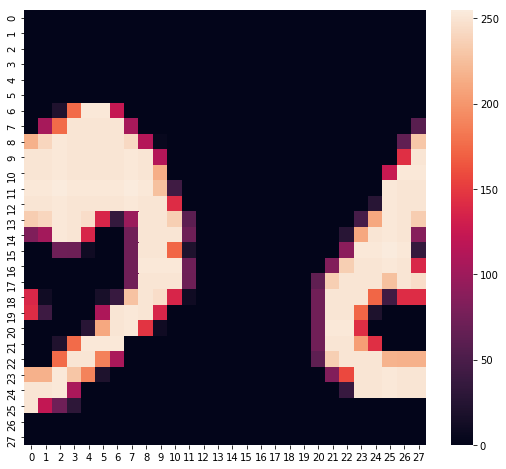

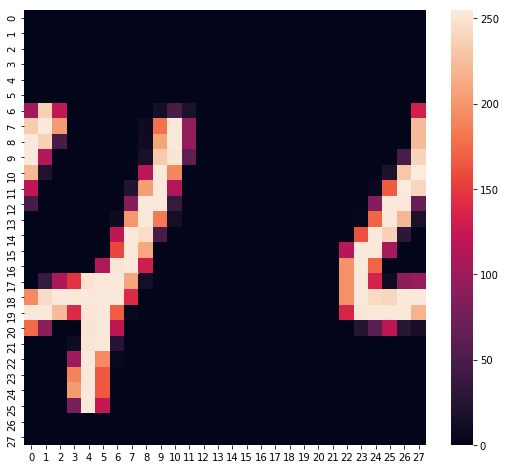

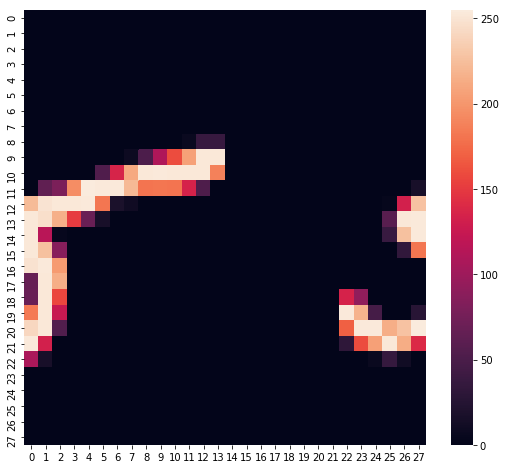

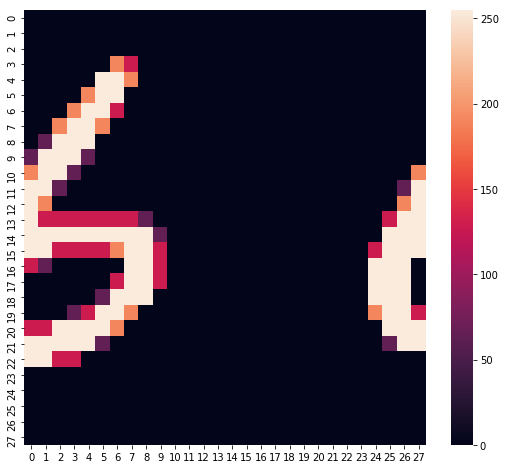

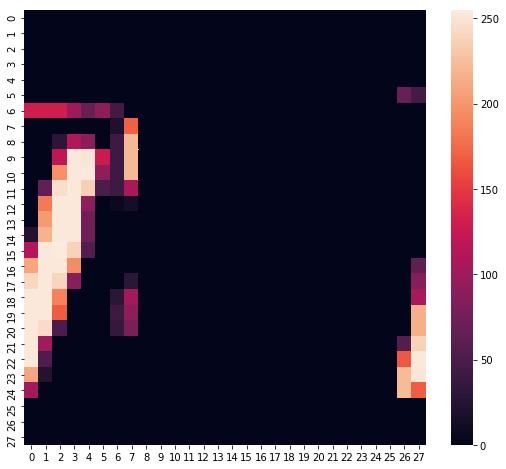

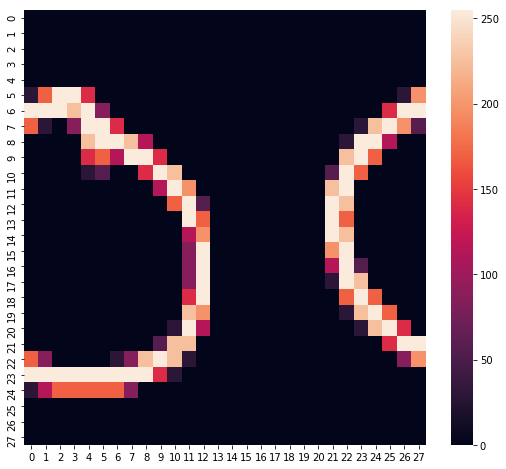

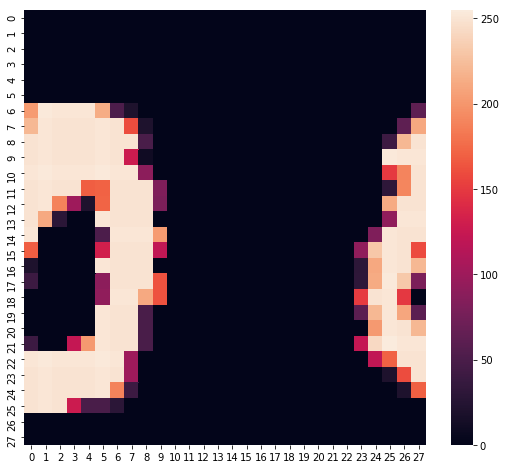

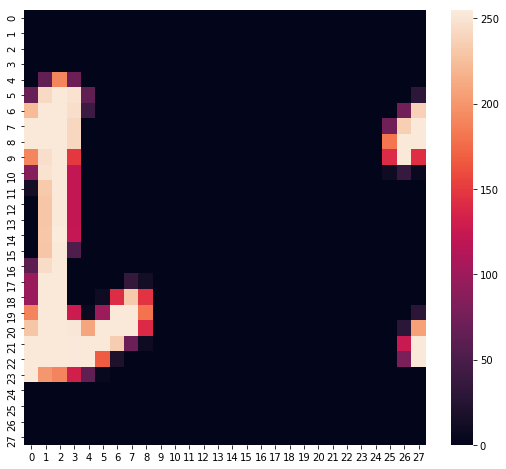

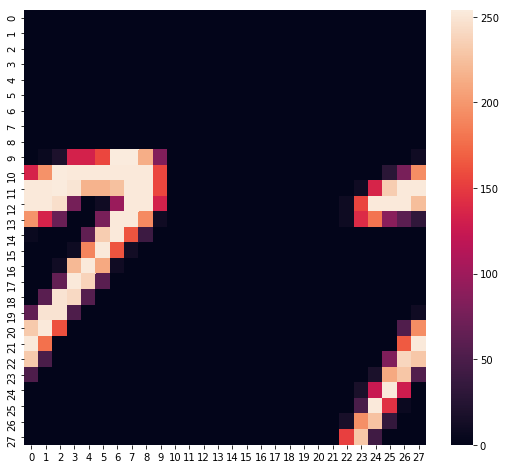

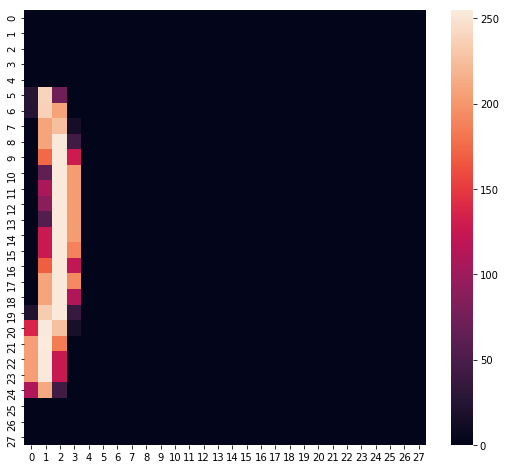

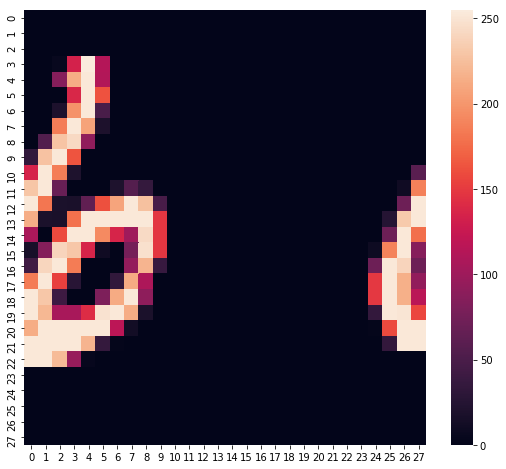

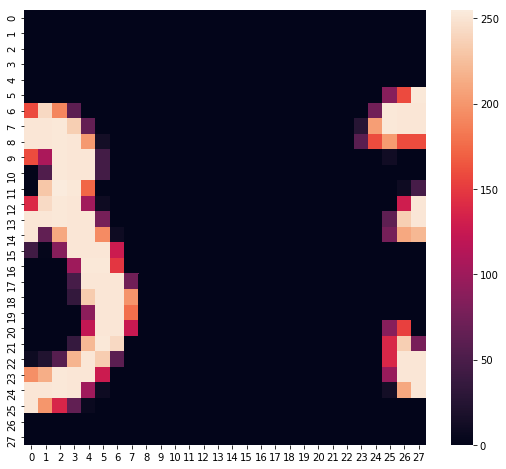

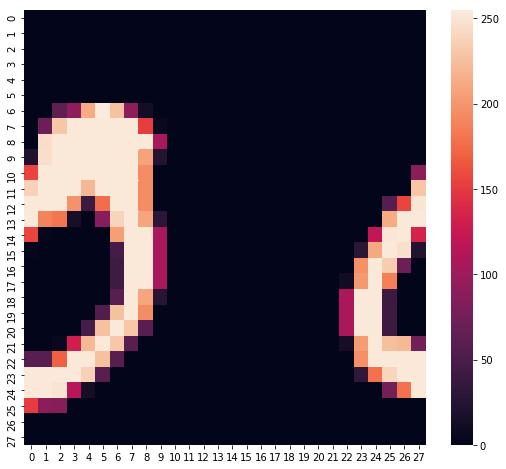

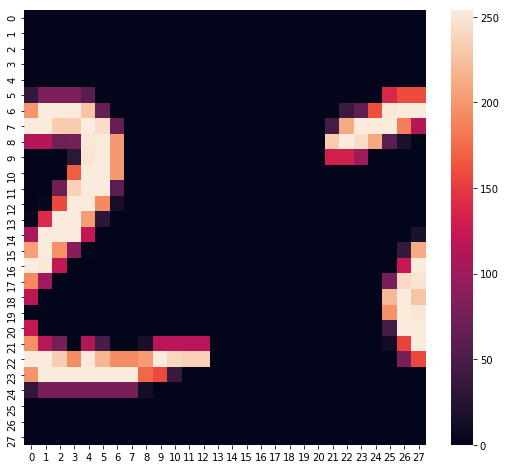

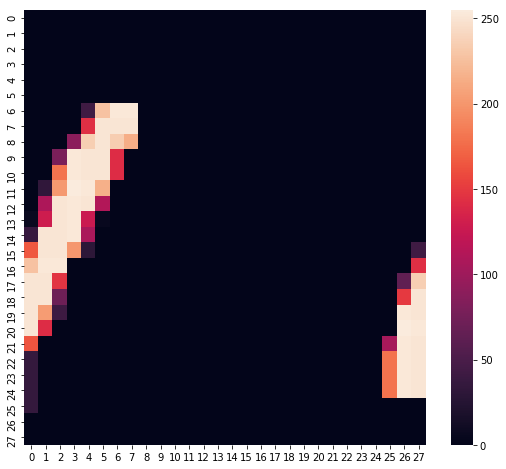

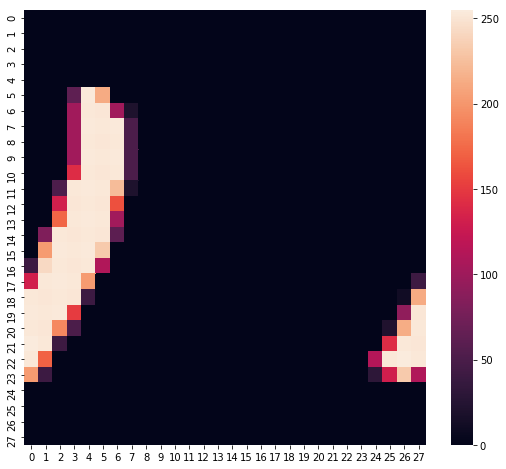

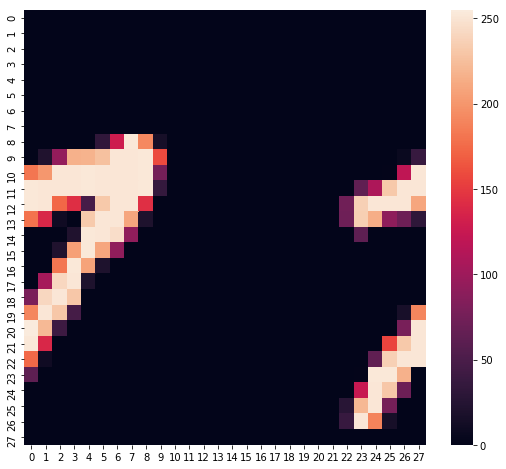

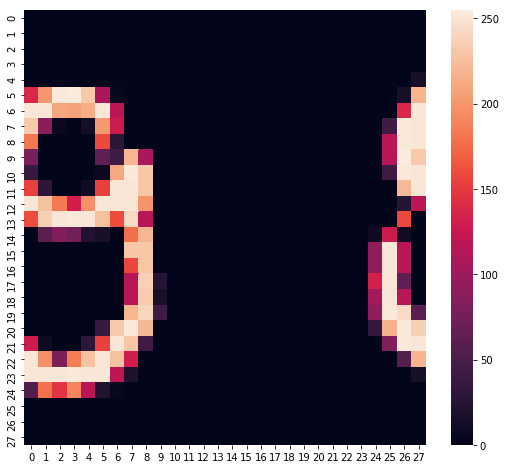

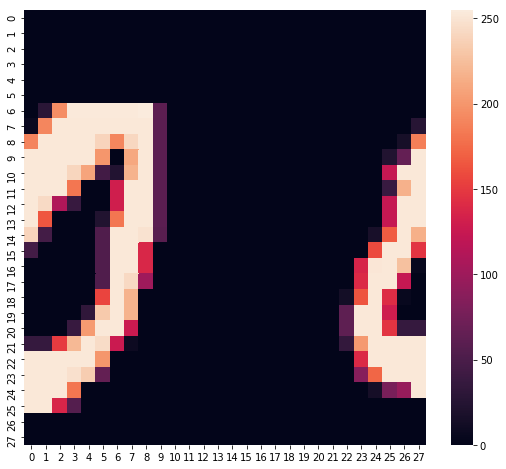

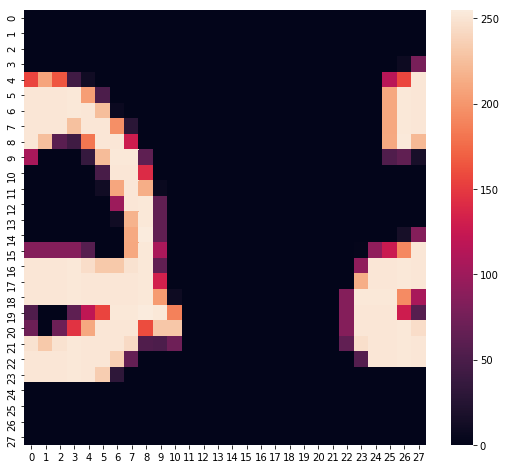

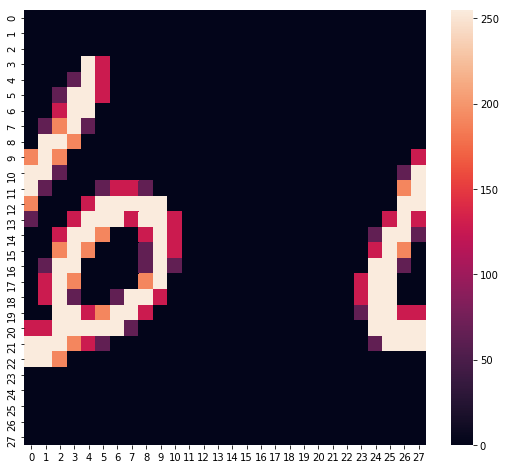

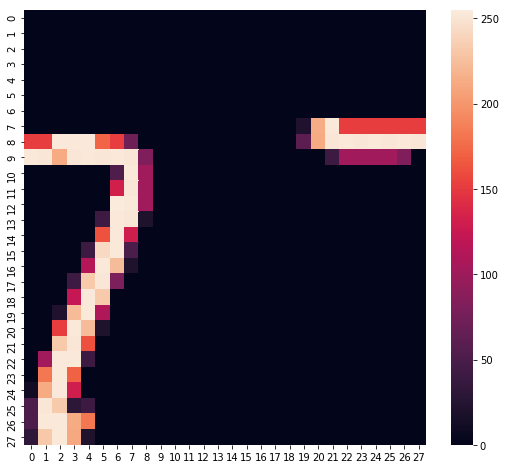

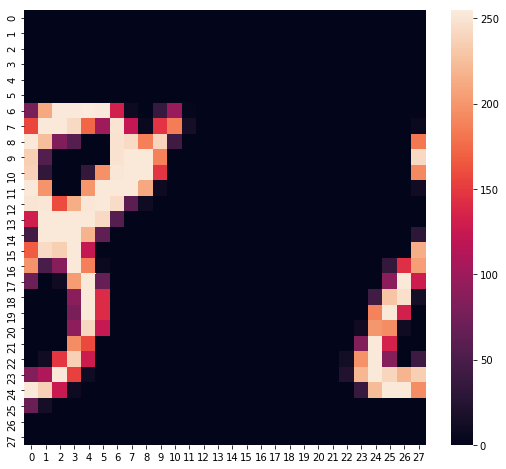

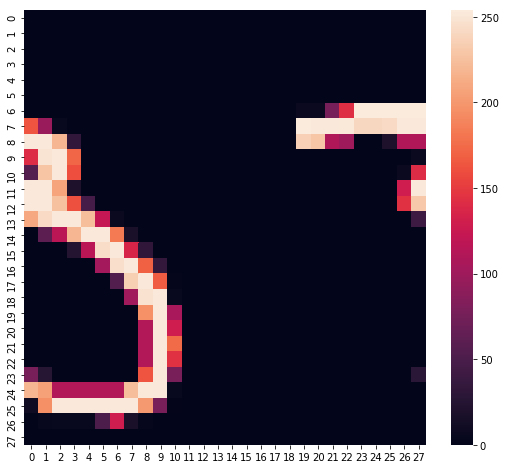

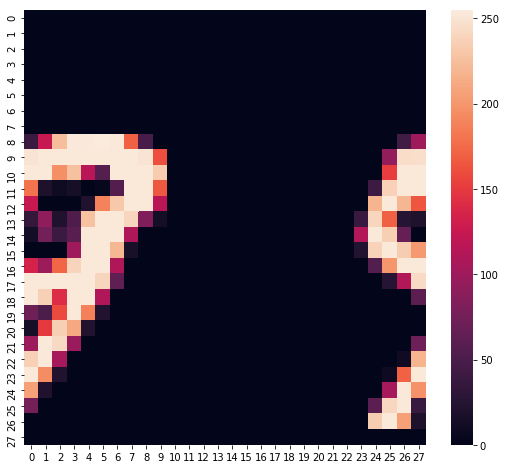

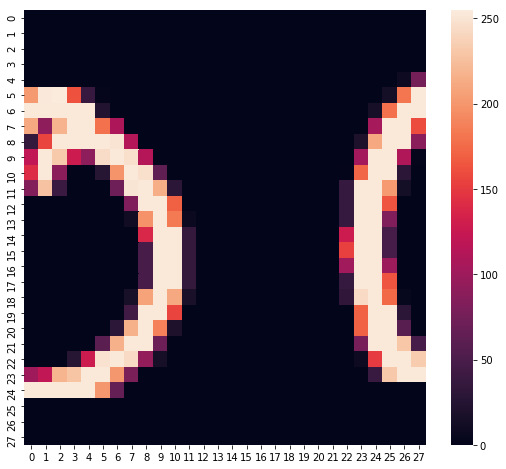

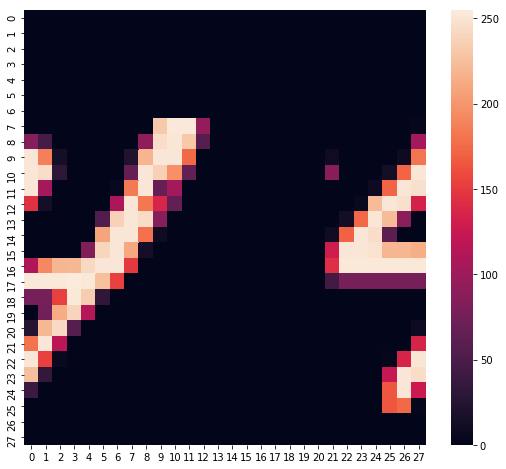

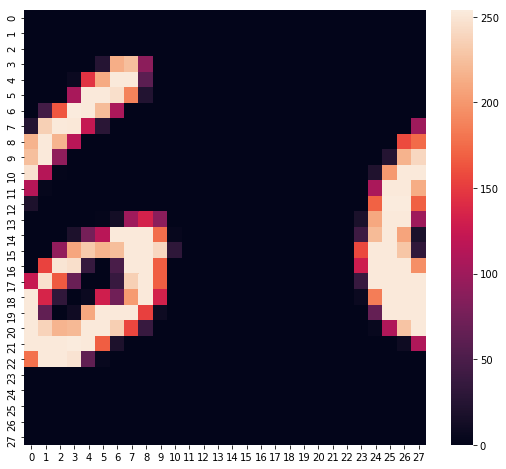

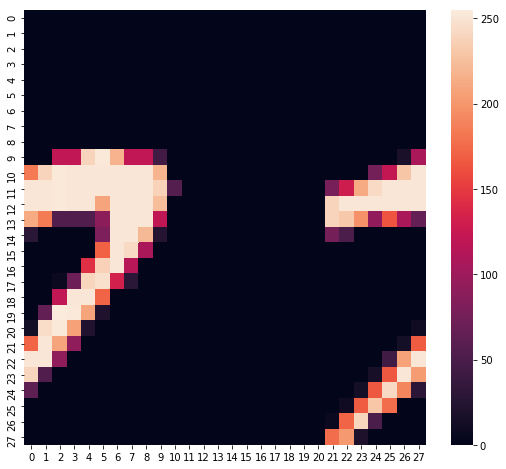

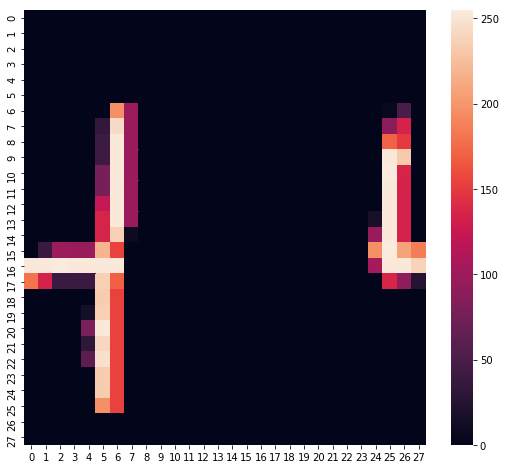

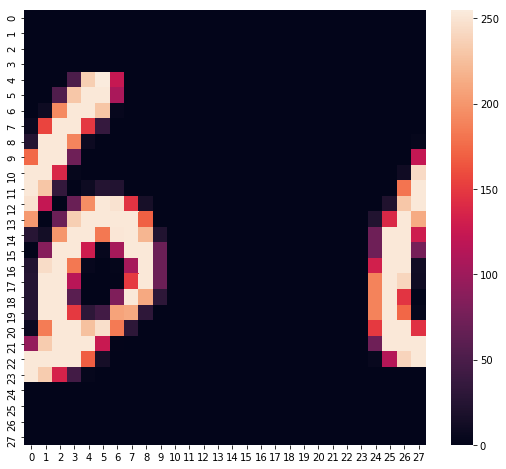

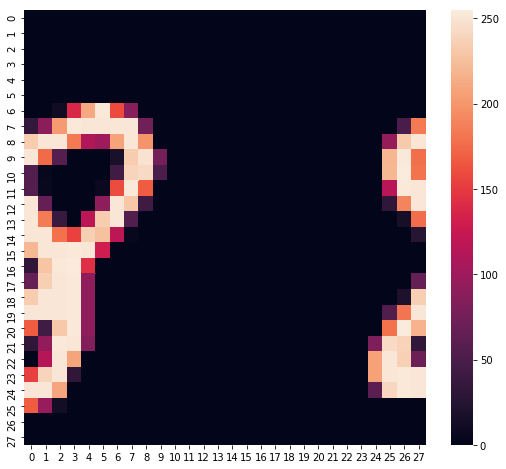

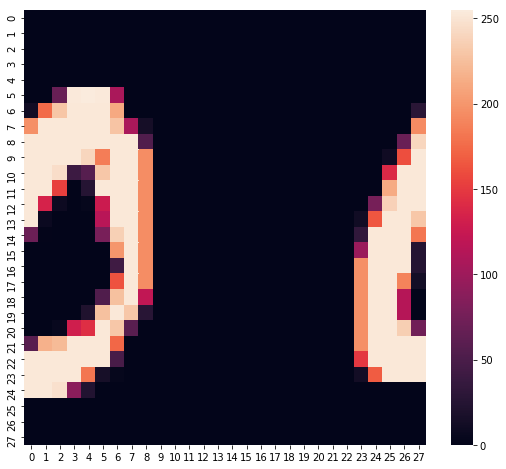

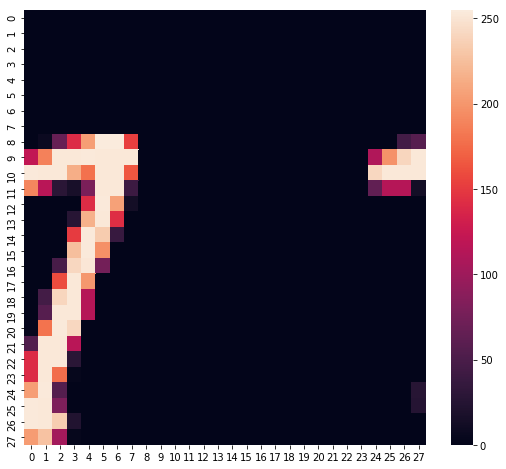

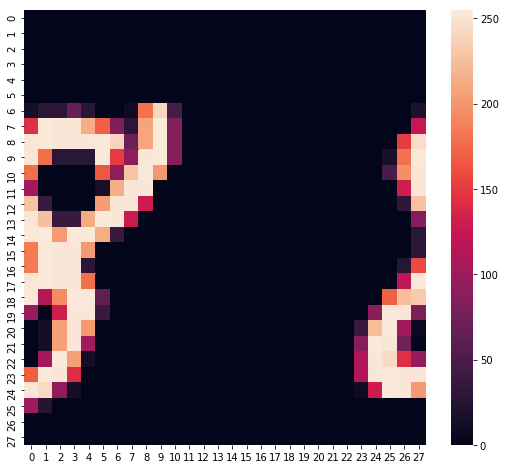

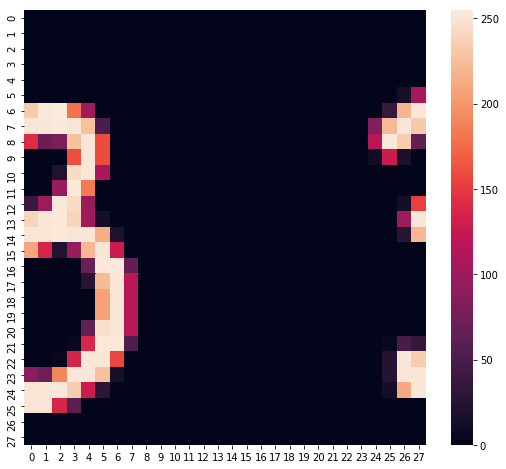

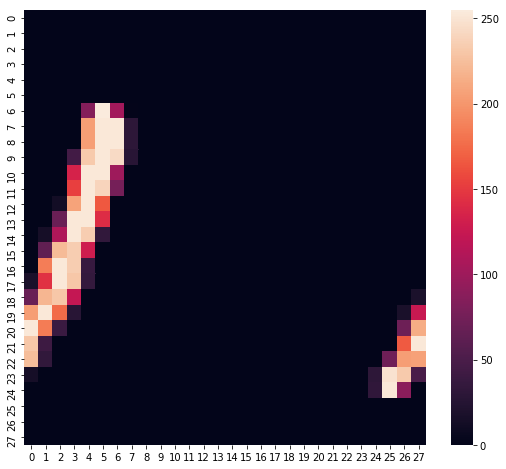

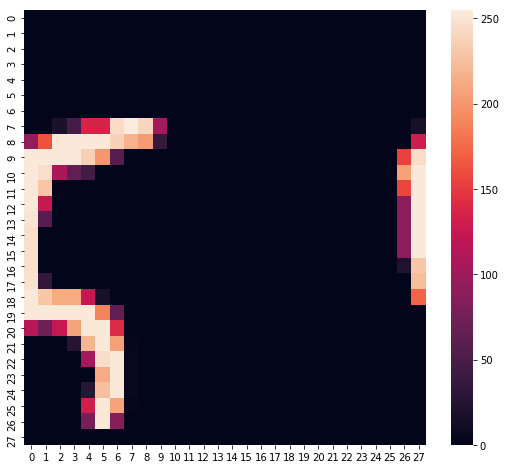

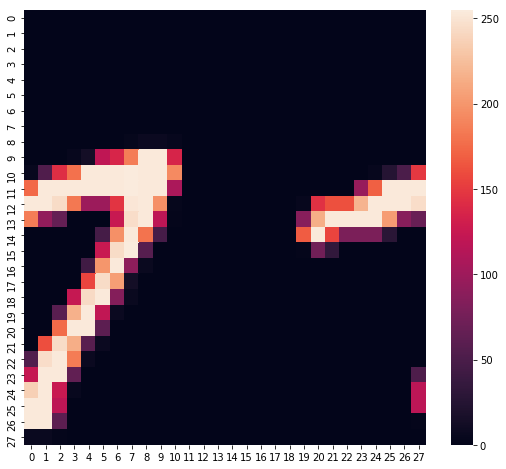

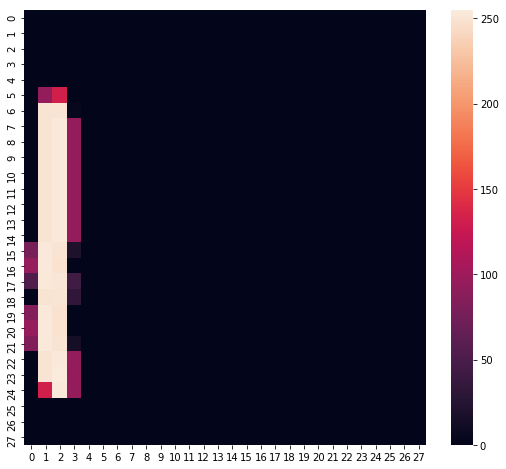

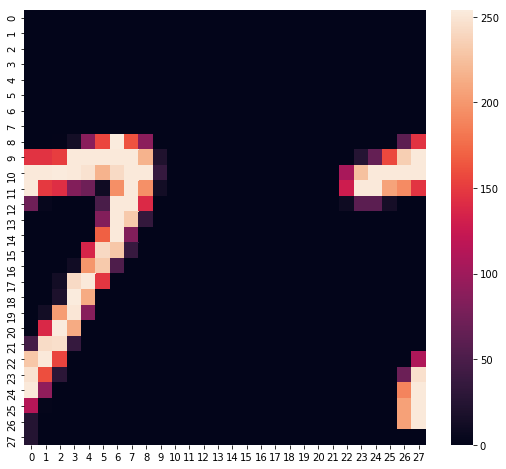

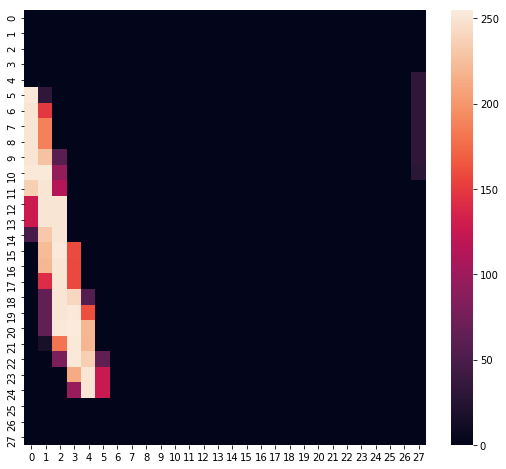

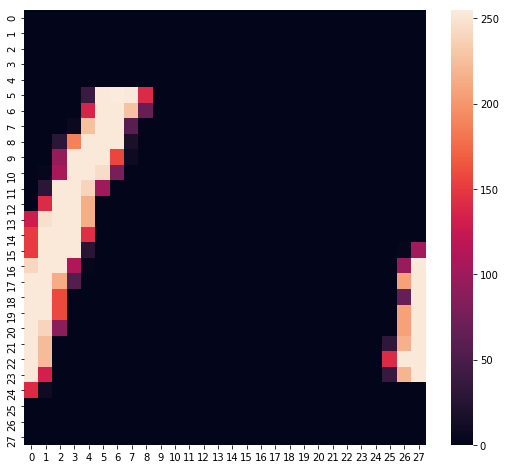

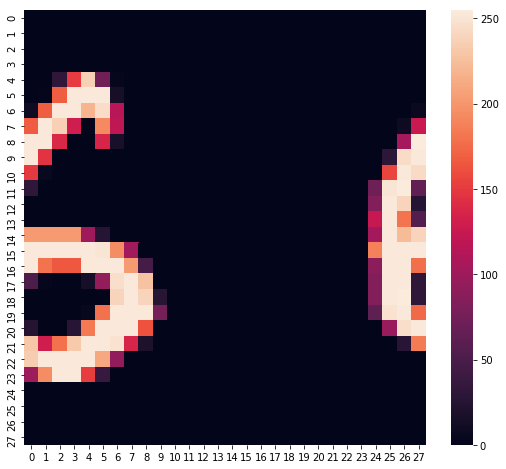

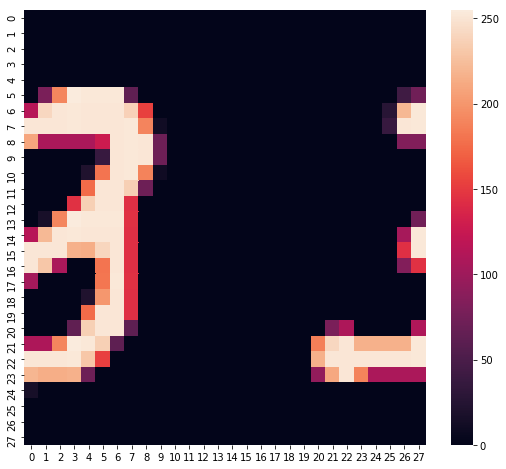

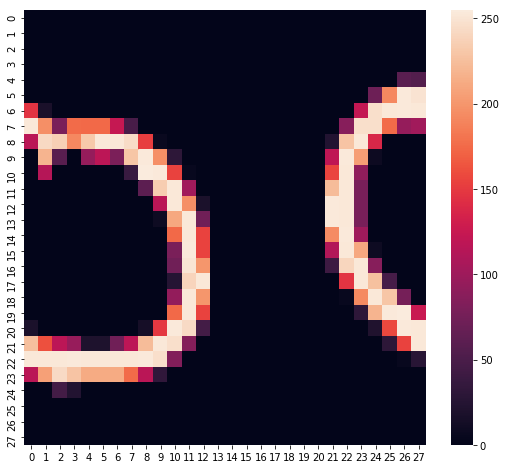

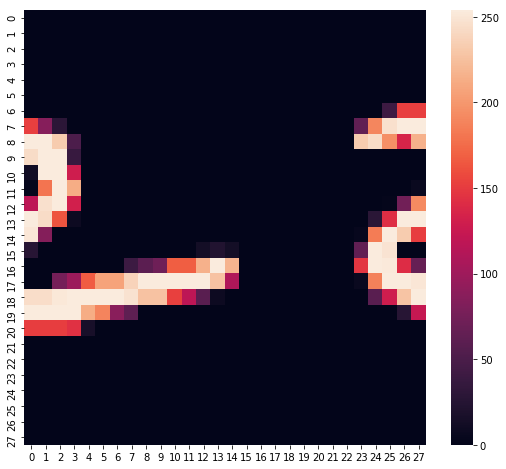

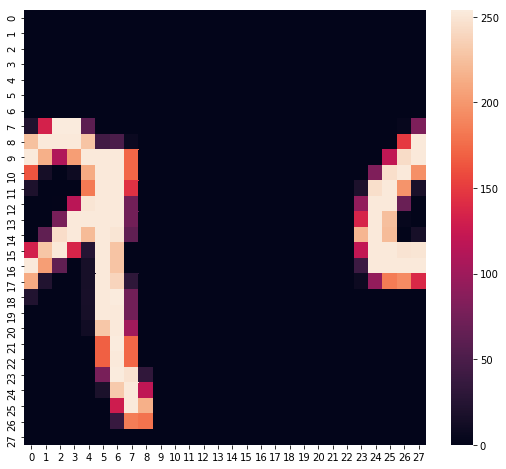

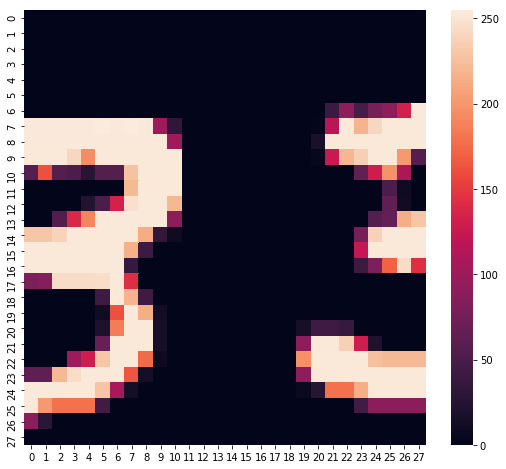

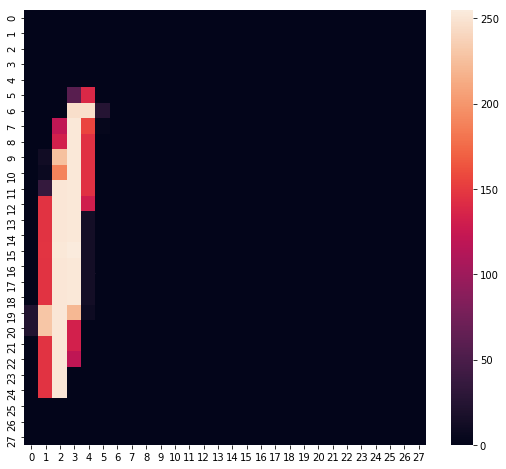

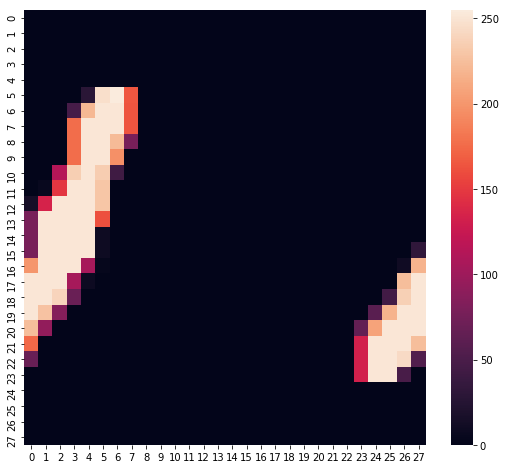

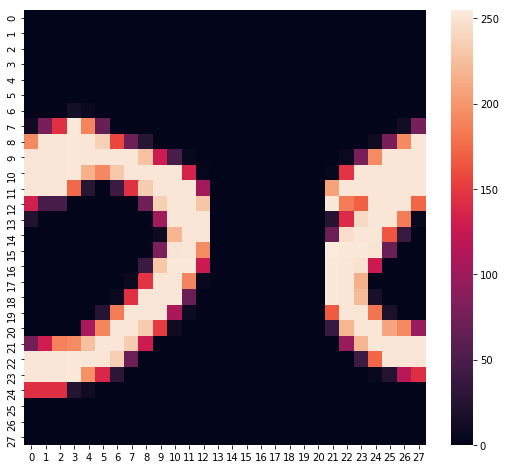

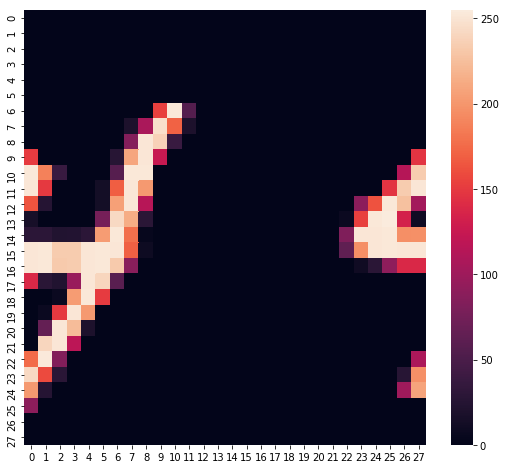

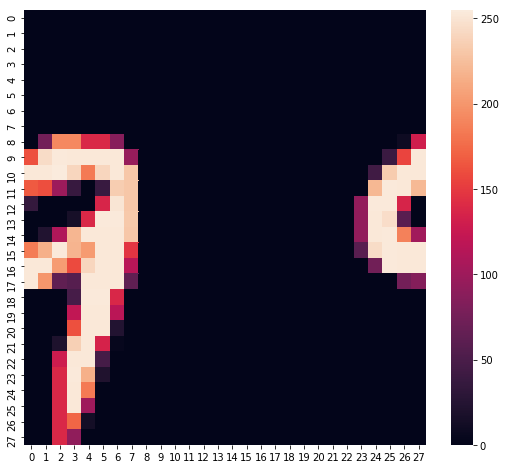

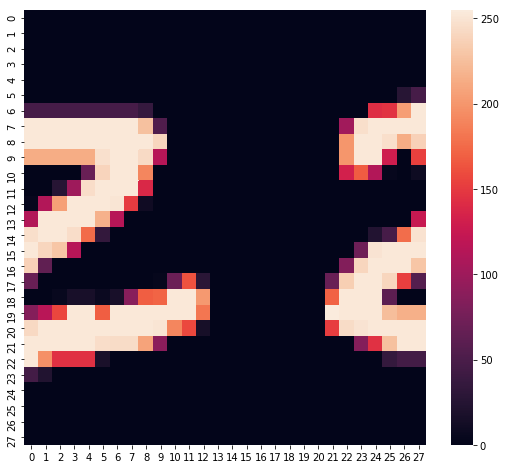

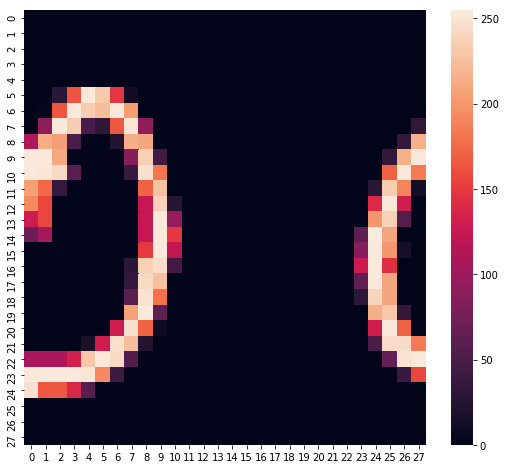

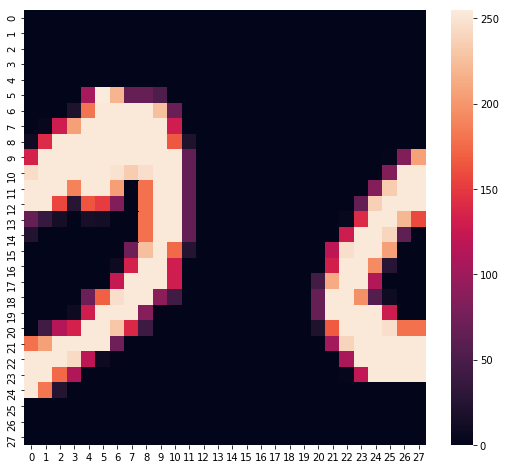

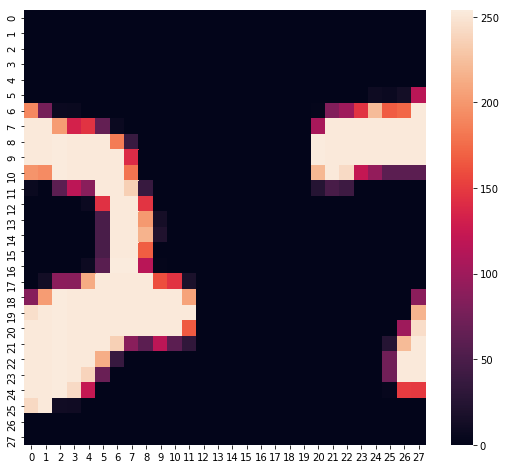

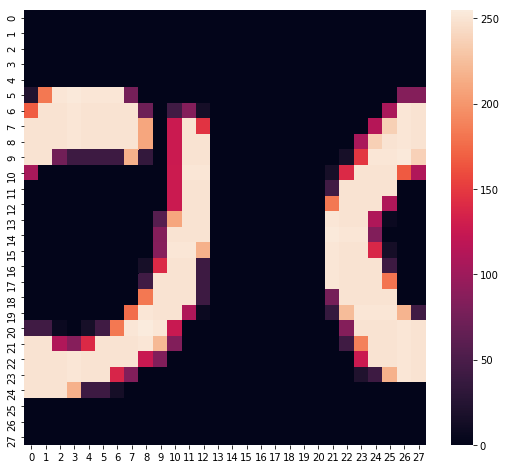

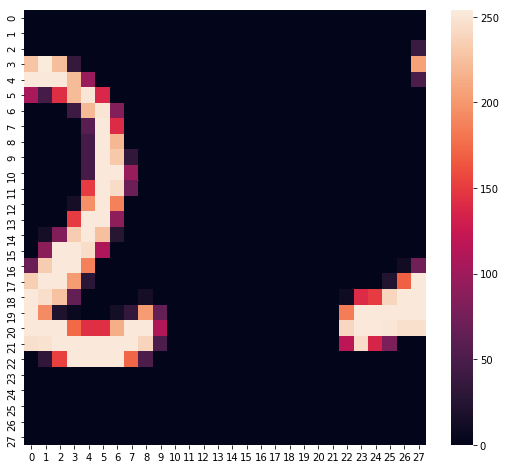

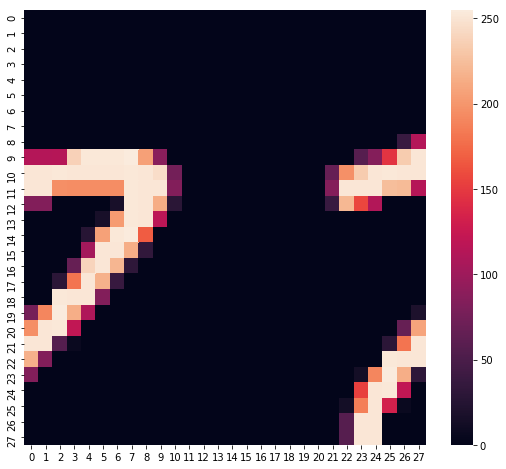

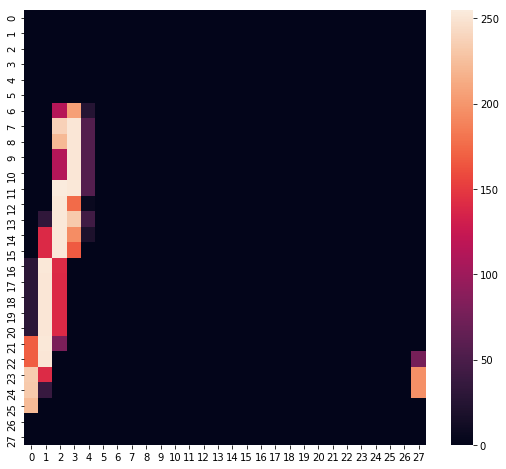

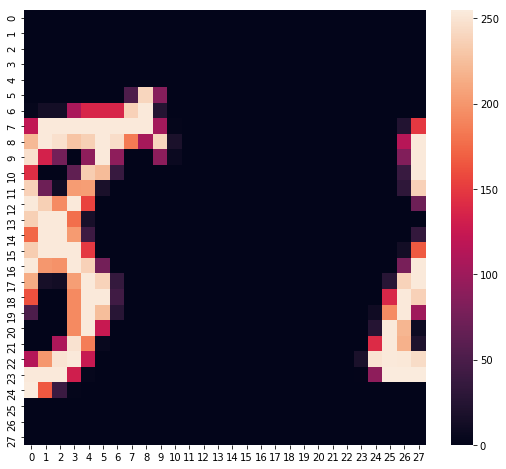

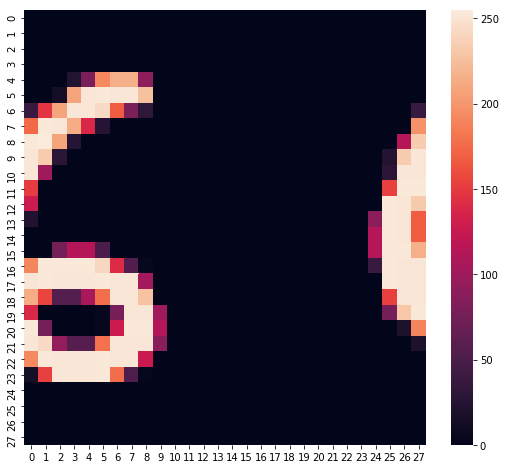

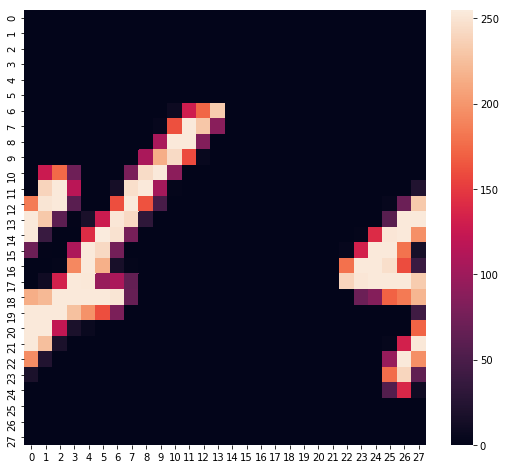

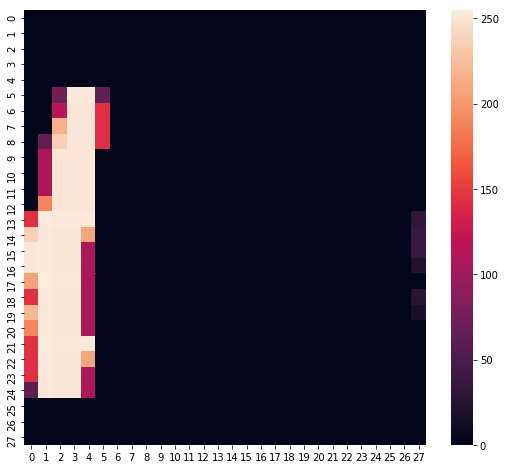

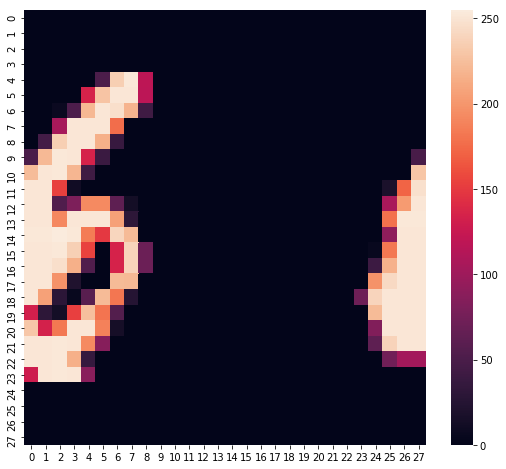

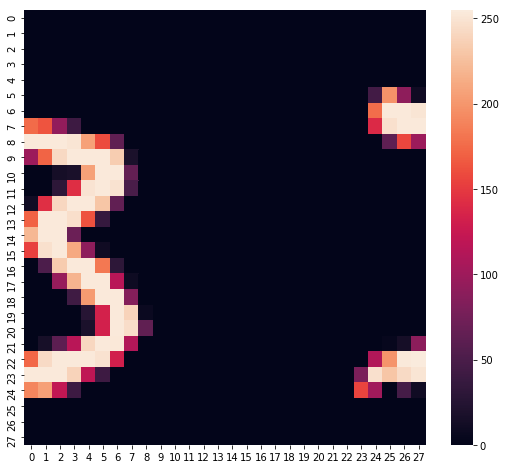

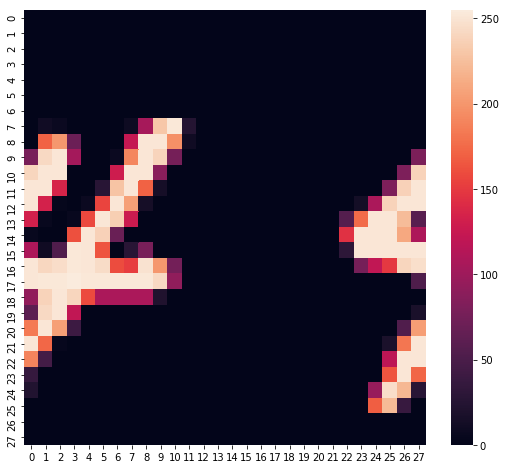

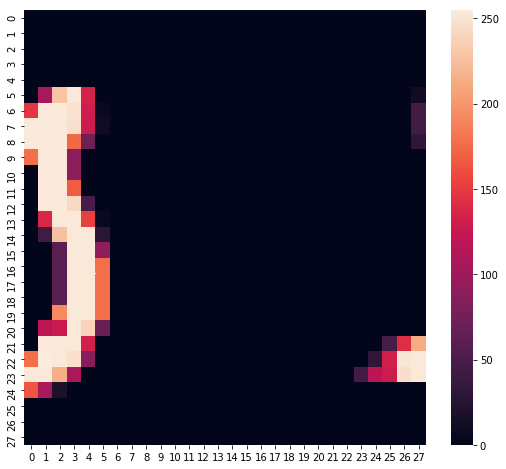

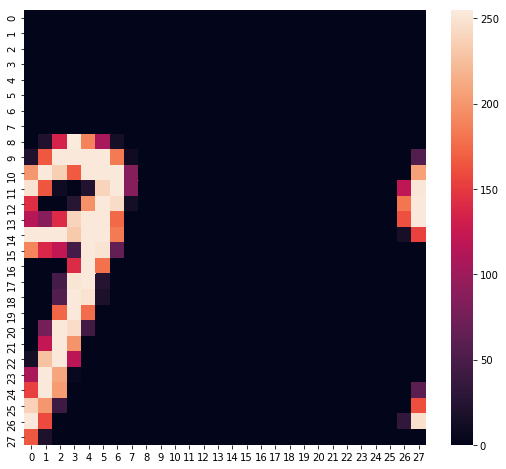

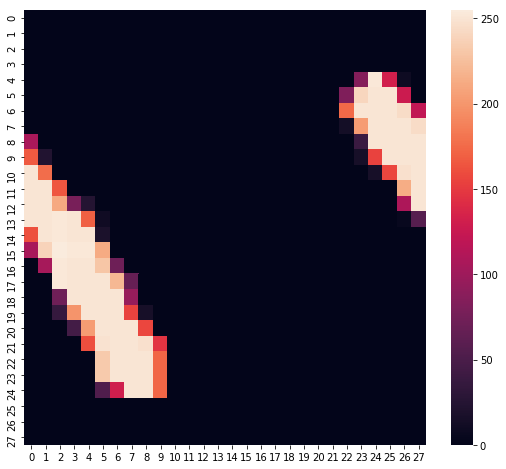

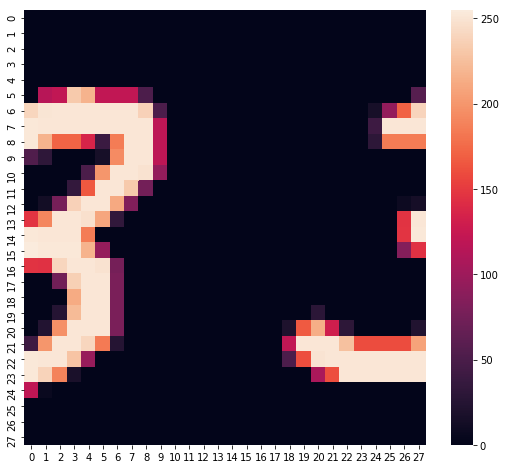

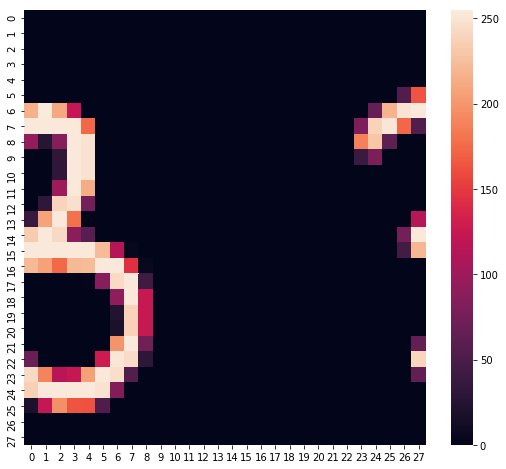

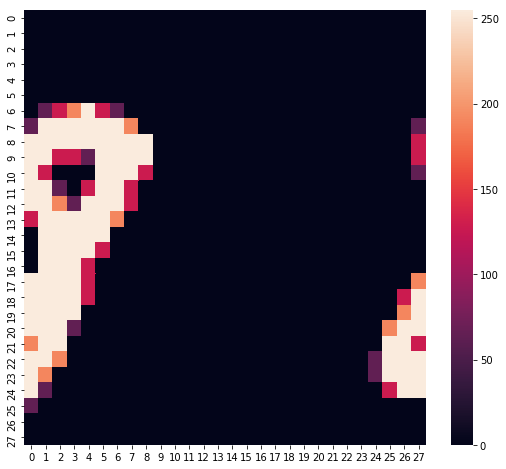

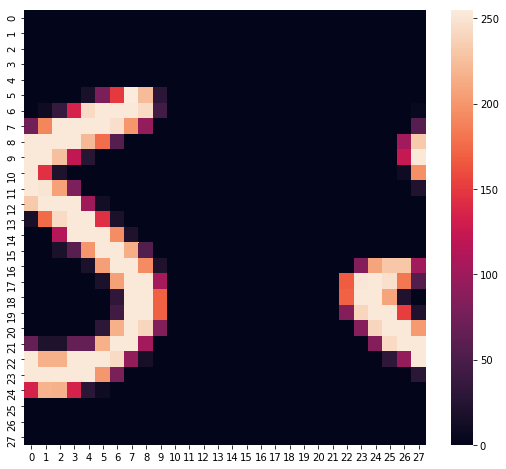

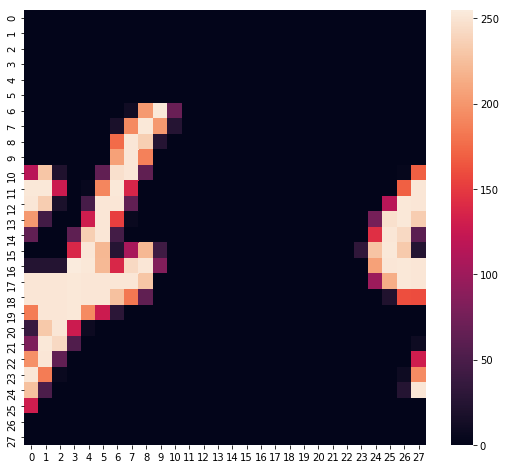

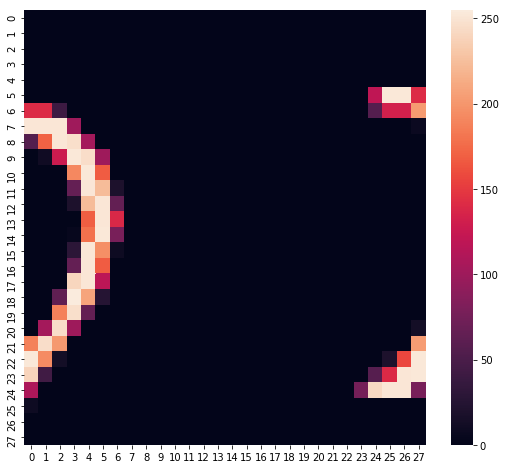

KeyboardInterrupt: 

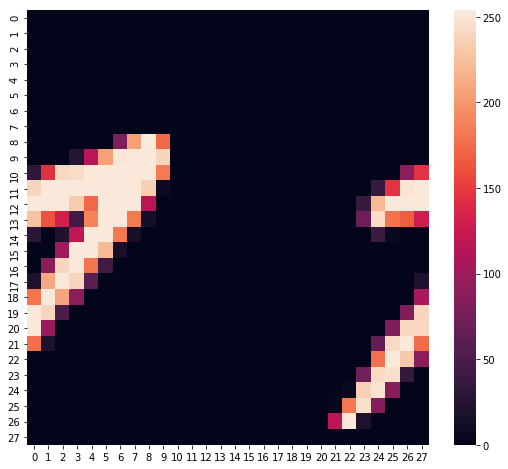

In [39]:
import seaborn as sb

for im in images:
    plt.figure(figsize=(9, 8))
    sb.heatmap(im)
    plt.show()

### Evaluate model

In [ ]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
classes = model.predict_classes(X_test, batch_size=32)
proba = model.predict_proba(X_test, batch_size=32)

### plot litt og print nå greier her  
finn ut om det funker først kanskje